<a href="https://colab.research.google.com/github/menouahmad/Data-Bootcamp-Final/blob/main/Copy_of_Final_Project_RishaBaid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Predicting Market Reactions to Earnings Calls Using Financial Language Models

A Predictive Model of Post-Earnings Market Reactions with Financial NLP

*Ahmad Alshikh Menou, Risha Baid*

In [1]:
##if the first code block does not run, make sure to uncomment this and run.
!pip install --no-cache-dir --force-reinstall -U numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 192.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1

In [2]:
import subprocess
import sys

#Install all dependencies with compatible versions
subprocess.run([
    sys.executable, "-m", "pip", "install", "-q",
    "requests", "pandas", "numpy", "yfinance",
    "defeatbeta-api", "nltk"
], check=True)

#Install PyTorch and compatible transformers
subprocess.run([
    sys.executable, "-m", "pip", "install", "-q",
    "torch", "torchvision", "torchaudio"
], check=True)

subprocess.run([
    sys.executable, "-m", "pip", "install", "-q",
    "transformers==4.36.2", "sentencepiece", "protobuf"
], check=True)

#Import everything
import requests
import re
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
import yfinance as yf
from defeatbeta_api.data.ticker import Ticker
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

#Download VADER
nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

#Load FinBERT
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
model.eval()

[nltk_data] Downloading package punkt_tab to /tmp/nltk...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


______      __           _    ______      _        
|  _  \    / _|         | |   | ___ \    | |       
| | | |___| |_ ___  __ _| |_  | |_/ / ___| |_ __ _ 
| | | / _ \  _/ _ \/ _` | __| | ___ \/ _ \ __/ _` |
| |/ /  __/ ||  __/ (_| | |_  | |_/ /  __/ || (_| |
|___/ \___|_| \___|\__,_|\__| \____/ \___|\__\__,_|
📈:: Data Update Time ::	2025-12-12 ::
📈:: Software Version ::	0.0.27      ::


/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [3]:
import requests
import re
import numpy as np
import pandas as pd
import time
import readline
from datetime import datetime, timedelta
import yfinance as yf

#Objective

To build and evaluate predictive models that use linguistic features from corporate earnings calls, combined with firm characteristics to predict short-term stock market reactions following earnings announcements.

#Goals

- Transform unstructured earnings call text into predictive numerical features using VADER and FinBERT.

- Evaluate whether language alone contains predictive information about short-term market reactions.

- Compare traditional sentiment metrics (VADER) with financial language models (FinBERT).

- Assess which linguistic dimensions-tone, confidence, disagreement, or complexity—matter most for prediction.

#Sample Size


This study focuses on the top 2 companies (by market cap) for 5 main sectors i.e. Technology, Communication Services, Consumer Discretionary,  Health Care, Financials

#Data Sources

- Constituents List: The list of S&P 500 companies was obtained from  
  https://datahub.io/core/s-and-p-500-companies/r/constituents.csv.
- Transcripts: `defeatbeta_api` → `Ticker(...).earning_call_transcripts()` and `get_transcript(year, quarter)`; `content_full` concatenated per call.  
- Prices & Benchmark: `yfinance` → daily prices and volumes for firm tickers + SPY; used to compute 1-day, 3-day, and 5-day post-earnings returns and CAR5.  
- Firm Metadata: `yfinance.info` → sector, industry, company name, and `market_cap_billion`.  
- Baseline Sentiment: `nltk.sentiment.VADER` → sentence-level polarity scores aggregated into `vader_mean`, `vader_pos_share`, `vader_neg_share`, and `vader_neu_share`.  
- Financial NLP Model: Hugging Face Transformers → `ProsusAI/finbert`; used to extract financial sentiment scores, confidence, entropy, and dispersion measures from earnings call text.


# Data Collection

**Finding the top 2 companies (by market cap) from 5 main sectors through the S&P500 market data.**

In [4]:
sp500_url = "https://datahub.io/core/s-and-p-500-companies/r/constituents.csv" #getting top marketcap companies from s&p500 csv file

response = requests.get(sp500_url)
print(response)                  # <Response [200]>
print(response.text[:500])       # preview first 500 chars

#read the CSV text into a DataFrame
from io import StringIO
sp500 = pd.read_csv(StringIO(response.text))
sp500.head()

<Response [200]>
Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
ACN,Accenture,Information Te


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [5]:
#Rename the columns and prep tickers
sp500 = sp500.rename(columns={"Symbol": "ticker", "GICS Sector": "gics_sector"})
sp500["ticker"] = sp500["ticker"].astype(str).str.replace(".", "-", regex=False)  # BRK.B -> BRK-B for Yahoo

#Keep only these main 5 sectors
target_map = {
    "Information Technology": "Technology",
    "Communication Services": "Communication Services",
    "Consumer Discretionary": "Consumer Discretionary",
    "Health Care": "Health Care",
    "Financials": "Financials"
}

sp500 = sp500[sp500["gics_sector"].isin(target_map.keys())].copy()
sp500["chosen_sector"] = sp500["gics_sector"].map(target_map)

sp500[["ticker","gics_sector","chosen_sector"]].head()

,ticker,gics_sector,chosen_sector
2,ABT,Health Care,Health Care
3,ABBV,Health Care,Health Care
4,ACN,Information Technology,Technology
5,ADBE,Information Technology,Technology
6,AMD,Information Technology,Technology


In [6]:
#Pull market caps from Yahoo finance
rows = []
for i in range(len(sp500)):
    t = sp500.iloc[i]["ticker"]
    s = sp500.iloc[i]["chosen_sector"]
    try:
        info = yf.Ticker(t).info
        mc = info.get("marketCap", None)
    except Exception:
        mc = None
    print(t, mc)
    rows.append({"ticker": t, "chosen_sector": s, "market_cap": mc})
    time.sleep(0.05)

#Create DataFrame, remove missing market caps, and clean formatting
mktcaps = pd.DataFrame(rows).dropna(subset=["market_cap"]).copy()
mktcaps["market_cap"] = mktcaps["market_cap"].astype("int64")

#Sort by sector and descending market cap for easy comparison
mktcaps = mktcaps.sort_values(["chosen_sector","market_cap"], ascending=[True, False])
mktcaps.head()


ABT 217766232064
ABBV 393808642048
ACN 178268864512
ADBE 150934601728
AMD 327334035456
AFL 59077484544
A 38811205632
ABNB 82033459200
AKAM 12730634240
ALGN 11702199296
ALL 54000144384
GOOGL 3663432253440
GOOG 3666819416064
AMZN 2424113201152
AXP 261317689344
AIG 47749591040
AMP 45975302144
AMGN 174693892096
APH 158649843712
ADI 134615711744
AON 76120498176
APO 84915830784
AAPL 4039405731840
AMAT 201948856320
APTV 16895982592
ACGL 35997093888
ANET 156932112384
AJG 64879214592
AIZ 12010806272
T 173468352512
ADSK 63738118144
AZO 56830328832
BAC 401900961792
BAX 9803043840
BDX 55806365696
BRK-B 1085980803072
BBY 15076867072
TECH 8896905216
BIIB 24926183424
BLK 165234163712
BX 188635742208
XYZ 39251111936
BK 80714809344
BKNG 173246087168
BSX 142477492224
BMY 108566716416
AVGO 1557813788672
BRO 27678984192
CDNS 85861597184
CZR 4987636736
COF 155274805248
CAH 47305175040
KMX 5903838720
CCL 38425698304
CBOE 26021951488
CDW 18752172032
COR 66070282240
CNC 19277336576
CRL 9540419584
SCHW 1764937

,ticker,chosen_sector,market_cap
12,GOOG,Communication Services,3666819416064
11,GOOGL,Communication Services,3663432253440
169,META,Communication Services,1674764615680
186,NFLX,Communication Services,398308376576
235,TMUS,Communication Services,225387675648


In [7]:
#Pick the top 2 companies per sector
top2 = []

#Filter companies in the current sector and take the top 2 largest by market cap
for sector in mktcaps["chosen_sector"].unique():
    top2.append(mktcaps[mktcaps["chosen_sector"] == sector].head(2))
    #Combine all sector subsets into one DataFrame
top2 = pd.concat(top2, ignore_index=True)

top2_display = top2[["chosen_sector","ticker","market_cap"]].copy()
top2_display["market_cap_bn"] = (top2_display["market_cap"]/1e9).round(1)
top2_display


,chosen_sector,ticker,market_cap,market_cap_bn
0,Communication Services,GOOG,3666819416064,3666.8
1,Communication Services,GOOGL,3663432253440,3663.4
2,Consumer Discretionary,AMZN,2424113201152,2424.1
3,Consumer Discretionary,TSLA,1607601225728,1607.6
4,Financials,BRK-B,1085980803072,1086.0
5,Financials,JPM,860672950272,860.7
6,Health Care,LLY,947447201792,947.4
7,Health Care,JNJ,501880258560,501.9
8,Technology,NVDA,4239786770432,4239.8
9,Technology,AAPL,4039405731840,4039.4


In [8]:
#dictionary to reuse later
sector_tickers = {}
for sec in top2["chosen_sector"].unique():
    sector_tickers[sec] = top2[top2["chosen_sector"] == sec]["ticker"].tolist()
sector_tickers

{'Communication Services': ['GOOG', 'GOOGL'],
 'Consumer Discretionary': ['AMZN', 'TSLA'],
 'Financials': ['BRK-B', 'JPM'],
 'Health Care': ['LLY', 'JNJ'],
 'Technology': ['NVDA', 'AAPL']}

In [9]:
#Flatten to a DataFrame and verify sectors from Yahoo Finance
rows = []
for sector, tickers in sector_tickers.items():
    for t in tickers:
        info = yf.Ticker(t).info  #metadata call
        market_cap = info.get("marketCap", None)
        rows.append({
            "chosen_sector": sector,
            "ticker": t,
            "yf_sector": info.get("sector"),
            "yf_industry": info.get("industry"),
            "shortName": info.get("shortName"),
            "market_cap": market_cap,
            "market_cap_billion": round(market_cap / 1e9, 2) if market_cap else None
        })

universe = pd.DataFrame(rows)
universe

,chosen_sector,ticker,yf_sector,yf_industry,shortName,market_cap,market_cap_billion
0,Communication Services,GOOG,Communication Services,Internet Content & Information,Alphabet Inc.,3666819416064,3666.82
1,Communication Services,GOOGL,Communication Services,Internet Content & Information,Alphabet Inc.,3663432253440,3663.43
2,Consumer Discretionary,AMZN,Consumer Cyclical,Internet Retail,"Amazon.com, Inc.",2424113201152,2424.11
3,Consumer Discretionary,TSLA,Consumer Cyclical,Auto Manufacturers,"Tesla, Inc.",1607601225728,1607.60
4,Financials,BRK-B,Financial Services,Insurance - Diversified,Berkshire Hathaway Inc. New,1085980803072,1085.98
5,Financials,JPM,Financial Services,Banks - Diversified,JP Morgan Chase & Co.,860672950272,860.67
6,Health Care,LLY,Healthcare,Drug Manufacturers - General,Eli Lilly and Company,947447201792,947.45
7,Health Care,JNJ,Healthcare,Drug Manufacturers - General,Johnson & Johnson,501880258560,501.88
8,Technology,NVDA,Technology,Semiconductors,NVIDIA Corporation,4239786770432,4239.79
9,Technology,AAPL,Technology,Consumer Electronics,Apple Inc.,4039405731840,4039.41


**Extracting earnings-call transcripts from the DefeatBeta API [https://github.com/defeat-beta/defeatbeta-api/].**

In [10]:
#import the Ticker class from Earnings Call transcript API
from defeatbeta_api.data.ticker import Ticker

In [11]:
#Flatten dictionary into a simple list of tickers
tickers = [t for tickers_list in sector_tickers.values() for t in tickers_list]
tickers

['GOOG', 'GOOGL', 'AMZN', 'TSLA', 'BRK-B', 'JPM', 'LLY', 'JNJ', 'NVDA', 'AAPL']

In [12]:
#Pull the transcripts list (includes transcripts + transcripts_id)
all_meta = []

for tk in tickers:
    tr = Ticker(tk).earning_call_transcripts()
    df = tr.get_transcripts_list()
    df["symbol"] = tk
    all_meta.append(df)

meta_df = pd.concat(all_meta, ignore_index=True)

#Clean report date
meta_df["report_date"] = pd.to_datetime(
    meta_df["report_date"], errors="coerce"
).dt.date

#Keep last 10 fiscal years
current_year = pd.Timestamp.today().year
meta_10y = meta_df[
    meta_df["fiscal_year"].astype(int).between(current_year - 9, current_year)
].copy()

#Drop duplicates per symbol / year / quarter
meta_10y = (
    meta_10y
    .sort_values(["symbol","fiscal_year","fiscal_quarter"], ascending=[True, False, False])
    .drop_duplicates(subset=["symbol","fiscal_year","fiscal_quarter"])
    .reset_index(drop=True)
)

meta_10y.head()

,symbol,fiscal_year,fiscal_quarter,report_date,transcripts,transcripts_id
0,AAPL,2025,4,2025-10-30,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",<NA>
1,AAPL,2025,3,2025-07-31,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",<NA>
2,AAPL,2025,2,2025-05-01,"[{'paragraph_number': 1, 'speaker': 'AI Insigh...",<NA>
3,AAPL,2025,1,2025-01-30,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",506955
4,AAPL,2024,4,2024-10-31,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",455679


In [13]:
#Fetch full transcript text
rows = []

for sym, sub in meta_10y.groupby("symbol"):
    tr = Ticker(sym).earning_call_transcripts()

    for _, r in sub.iterrows():
        try:
            tdf = tr.get_transcript(int(r.fiscal_year), int(r.fiscal_quarter))
            content_full = (
                " ".join(tdf["content"].astype(str))
                if tdf is not None and not tdf.empty
                else ""
            )
        except Exception:
            content_full = ""

        rows.append({
            "symbol": sym,
            "fiscal_year": r.fiscal_year,
            "fiscal_quarter": r.fiscal_quarter,
            "report_date": r.report_date,
            "transcripts": r.get("transcripts"),
            "transcripts_id": r.get("transcripts_id"),
            "content_full": content_full
        })

df_calls = pd.DataFrame(rows)
df_calls.head()


,symbol,fiscal_year,fiscal_quarter,report_date,transcripts,transcripts_id,content_full
0,AAPL,2025,4,2025-10-30,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",<NA>,"Good afternoon, and welcome to the Apple Q4 Fi..."
1,AAPL,2025,3,2025-07-31,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",<NA>,"Good afternoon, and welcome to the Apple Q3 Fi..."
2,AAPL,2025,2,2025-05-01,"[{'paragraph_number': 1, 'speaker': 'AI Insigh...",<NA>,"Good afternoon, and welcome to the Apple Q2 F..."
3,AAPL,2025,1,2025-01-30,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",506955,"Good afternoon, and welcome to the Apple Q1 Fi..."
4,AAPL,2024,4,2024-10-31,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",455679,"Good afternoon, and welcome to the Apple Q4 Fi..."


In [14]:
#Vader for Sentimental Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
def compute_key_features(text):
    #Handle missing or empty text
    if not isinstance(text, str) or not text.strip():
        return {
            'vader_mean': np.nan,
            'vader_pos_share': np.nan,
            'vader_neg_share': np.nan,
            'vader_neu_share': np.nan,
            'avg_sentence_length': np.nan
        }

    #Split into sentences
    sentences = re.split(r'[.!?]+\s+', text.strip())
    sentences = [s for s in sentences if len(s.split()) >= 3]

    #If no usable sentences, fall back to full text
    if not sentences:
        score = sia.polarity_scores(text)['compound']
        return {
            'vader_mean': score,
            'vader_pos_share': np.nan,
            'vader_neg_share': np.nan,
            'vader_neu_share': np.nan,
            'avg_sentence_length': np.nan
        }

    #Sentence-level VADER scores
    scores = np.array(
        [sia.polarity_scores(s)['compound'] for s in sentences],
        dtype=float
    )

    return {
        'vader_mean': scores.mean(),
        'vader_pos_share': (scores > 0.05).mean(),
        'vader_neg_share': (scores < -0.05).mean(),
        'vader_neu_share': ((scores >= -0.05) & (scores <= 0.05)).mean(),
        'avg_sentence_length': np.mean([len(s.split()) for s in sentences])
    }

In [16]:
#Computing features on `content_full` and attaching to the same DataFrame
features = (
    df_calls['content_full']
    .apply(compute_key_features)
    .apply(pd.Series)
)

df_final = pd.concat(
    [df_calls.reset_index(drop=True),
     features.reset_index(drop=True)],
    axis=1
)

df_final.head()

,symbol,fiscal_year,fiscal_quarter,report_date,transcripts,transcripts_id,content_full,vader_mean,vader_pos_share,vader_neg_share,vader_neu_share,avg_sentence_length
0,AAPL,2025,4,2025-10-30,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",<NA>,"Good afternoon, and welcome to the Apple Q4 Fi...",0.245773,0.524027,0.059497,0.416476,17.558352
1,AAPL,2025,3,2025-07-31,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",<NA>,"Good afternoon, and welcome to the Apple Q3 Fi...",0.251060,0.543779,0.062212,0.394009,18.069124
2,AAPL,2025,2,2025-05-01,"[{'paragraph_number': 1, 'speaker': 'AI Insigh...",<NA>,"Good afternoon, and welcome to the Apple Q2 F...",0.216898,0.529284,0.088937,0.381779,16.869848
3,AAPL,2025,1,2025-01-30,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",506955,"Good afternoon, and welcome to the Apple Q1 Fi...",0.276358,0.609700,0.071594,0.318707,17.618938
4,AAPL,2024,4,2024-10-31,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",455679,"Good afternoon, and welcome to the Apple Q4 Fi...",0.294967,0.640553,0.076037,0.283410,17.709677


In [17]:
#Events table: one row per (symbol, report_date)
events = df_final[['symbol','report_date']].dropna().copy()
events['report_date'] = pd.to_datetime(events['report_date'])

#Yahoo formatting (BRK.B -> BRK-B)
events['yahoo_symbol'] = events['symbol'].astype(str).str.replace('.', '-', regex=False)

#Tickers & benchmark
tickers = sorted(events['yahoo_symbol'].unique().tolist())
if 'SPY' not in tickers:
    tickers.append('SPY')

#Download window (buffer so +5 days always exists)
dmin = events['report_date'].min() - pd.Timedelta(days=20)
dmax = events['report_date'].max() + pd.Timedelta(days=20)

#Download prices once
data = yf.download(
    tickers,
    start=dmin,
    end=dmax,
    progress=False,
    auto_adjust=True
)[['Close','Volume']]

close = data['Close']     #columns = tickers
vol   = data['Volume']    #columns = tickers

#Compute event-window returns for one row
def event_metrics(row):
    sym = row['yahoo_symbol']
    dt  = row['report_date']

    #skip if ticker missing
    if sym not in close.columns or 'SPY' not in close.columns:
        return pd.Series({
            'day0': pd.NaT,
            'price_return_1day': np.nan,
            'price_return_3day': np.nan,
            'price_return_5day': np.nan,
            'bench_return_5day': np.nan,
            'CAR5': np.nan,
            'volume_change': np.nan
        })

    p = close[sym].dropna()
    b = close['SPY'].dropna()
    v = vol[sym].dropna()

    #Align event date to next trading day
    i0 = p.index.searchsorted(dt)
    if i0 >= len(p):
        return pd.Series({
            'day0': pd.NaT,
            'price_return_1day': np.nan,
            'price_return_3day': np.nan,
            'price_return_5day': np.nan,
            'bench_return_5day': np.nan,
            'CAR5': np.nan,
            'volume_change': np.nan
        })

    i_m1 = max(0, i0 - 1)
    i_p3 = min(len(p) - 1, i0 + 3)
    i_p5 = min(len(p) - 1, i0 + 5)

    #Stock returns (relative to t-1)
    r1 = (p.iloc[i0]  / p.iloc[i_m1]) - 1
    r3 = (p.iloc[i_p3]/ p.iloc[i_m1]) - 1
    r5 = (p.iloc[i_p5]/ p.iloc[i_m1]) - 1

    #Benchmark return over same window
    b_aligned = b.reindex(p.index).ffill()
    rb5 = (b_aligned.iloc[i_p5] / b_aligned.iloc[i_m1]) - 1

    #CAR5
    car5 = r5 - rb5

    #Volume change on day0 vs day-1
    v_aligned = v.reindex(p.index).ffill()
    vol_chg = (v_aligned.iloc[i0] / v_aligned.iloc[i_m1]) - 1 if v_aligned.iloc[i_m1] != 0 else np.nan

    return pd.Series({
        'day0': p.index[i0].date(),
        'price_return_1day': float(r1),
        'price_return_3day': float(r3),
        'price_return_5day': float(r5),
        'bench_return_5day': float(rb5),
        'CAR5': float(car5),
        'volume_change': float(vol_chg)
    })

#Compute metrics & merge into df_final
metrics = events.apply(event_metrics, axis=1)
events_with_returns = pd.concat([events[['symbol','report_date']], metrics], axis=1)

df_final['report_date'] = pd.to_datetime(df_final['report_date']).dt.normalize()
events_with_returns['report_date'] = pd.to_datetime(events_with_returns['report_date']).dt.normalize()

#Merge onto df_final
df_big = df_final.merge(events_with_returns, on=['symbol','report_date'], how='left')

#Adding firm metadata from universe
if 'universe' in globals():
    meta_cols = ['ticker','shortName','chosen_sector','yf_industry','market_cap_billion']
    df_big = df_big.merge(
        universe[meta_cols].rename(columns={'ticker':'symbol'}),
        on='symbol',
        how='left'
    )

    #Move key id columns to front
    front = ['symbol','shortName','chosen_sector','yf_industry','market_cap_billion','report_date']
    rest = [c for c in df_big.columns if c not in front]
    df_big = df_big[front + rest]

print(df_big.shape)
df_big.head()

(353, 23)


,symbol,shortName,chosen_sector,yf_industry,market_cap_billion,report_date,fiscal_year,fiscal_quarter,transcripts,transcripts_id,...,vader_neg_share,vader_neu_share,avg_sentence_length,day0,price_return_1day,price_return_3day,price_return_5day,bench_return_5day,CAR5,volume_change
0,AAPL,Apple Inc.,Technology,Consumer Electronics,4039.41,2025-10-30,2025,4,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",<NA>,...,0.059497,0.416476,17.558352,2025-10-30,0.006303,0.001261,0.000259,-0.024848,0.025107,0.367998
1,AAPL,Apple Inc.,Technology,Consumer Electronics,4039.41,2025-07-31,2025,3,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",<NA>,...,0.062212,0.394009,18.069124,2025-07-31,-0.007080,-0.029323,0.052523,-0.003483,0.056007,0.773104
2,AAPL,Apple Inc.,Technology,Consumer Electronics,4039.41,2025-05-01,2025,2,"[{'paragraph_number': 1, 'speaker': 'AI Insigh...",<NA>,...,0.088937,0.381779,16.869848,2025-05-01,0.003859,-0.065835,-0.070635,0.018971,-0.089606,0.097142
3,AAPL,Apple Inc.,Technology,Consumer Electronics,4039.41,2025-01-30,2025,1,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",506955,...,0.071594,0.318707,17.618938,2025-01-30,-0.007395,-0.027406,-0.025652,0.007494,-0.033146,0.223633
4,AAPL,Apple Inc.,Technology,Consumer Electronics,4039.41,2024-10-31,2024,4,"[{'paragraph_number': 1, 'speaker': 'Suhasini ...",455679,...,0.076037,0.283410,17.709677,2024-10-31,-0.018210,-0.028901,-0.011386,0.026896,-0.038282,0.367514


In [18]:
def _safe_chunks(text):
    """Return 3 text chunks: start/middle/end (keeps it simple + avoids 512 token limit bias)."""
    if not isinstance(text, str) or not text.strip():
        return []
    n = len(text)
    if n < 2000:   #Short transcript: just score once
        return [text]
    return [text[:2000], text[n//2 - 1000:n//2 + 1000], text[-2000:]]

def _finbert_probs(text):
    """FinBERT probs: pos, neg, neu."""
    inputs = tokenizer(str(text), return_tensors="pt", truncation=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        logits = model(**inputs).logits
        p = torch.softmax(logits, dim=1).detach().cpu().numpy()[0]

    #model order: [positive, negative, neutral]
    return float(p[0]), float(p[1]), float(p[2])

def finbert_features(text):
    chunks = _safe_chunks(text)
    if not chunks:
        return pd.Series({
            "finbert_pos_avg3": np.nan,
            "finbert_neg_avg3": np.nan,
            "finbert_neu_avg3": np.nan,
            "finbert_score_avg3": np.nan,
            "finbert_score_std3": np.nan,
            "finbert_confidence": np.nan,
            "finbert_entropy": np.nan
        })

    scores = []
    probs_list = []

    for c in chunks:
        pos, neg, neu = _finbert_probs(c)
        probs_list.append([pos, neg, neu])
        scores.append(pos - neg)

    probs_arr = np.array(probs_list)
    pos_avg, neg_avg, neu_avg = probs_arr.mean(axis=0)

    score_avg = float(np.mean(scores))
    score_std = float(np.std(scores)) if len(scores) > 1 else 0.0

    #Confidence & entropy from averaged probs
    conf = float(max(pos_avg, neg_avg, neu_avg))
    p = np.array([pos_avg, neg_avg, neu_avg])
    ent = float(-(p * np.log(p + 1e-12)).sum())

    return pd.Series({
        "finbert_pos_avg3": float(pos_avg),
        "finbert_neg_avg3": float(neg_avg),
        "finbert_neu_avg3": float(neu_avg),
        "finbert_score_avg3": score_avg,
        "finbert_score_std3": score_std,
        "finbert_confidence": conf,
        "finbert_entropy": ent
    })

In [19]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [20]:
#flatten the existing dict
finbert_symbols = [t for lst in sector_tickers.values() for t in lst]

#keep only these 10 companies for FinBERT
df_finbert = df_big[df_big["symbol"].isin(finbert_symbols)].copy()

#run FinBERT only on this subset
fb = df_finbert["content_full"].apply(finbert_features)

df_finbert = pd.concat(
    [df_finbert.reset_index(drop=True), fb.reset_index(drop=True)],
    axis=1
)

#Disagreement between FinBERT and your VADER sentence-mean
df_finbert["sentiment_disagreement"] = (
    df_finbert["finbert_score_avg3"] - df_finbert["vader_mean"]
).abs()

#Quick check
df_finbert[[
    "symbol","chosen_sector","report_date",
    "vader_mean",
    "finbert_score_avg3","finbert_confidence","finbert_entropy",
    "sentiment_disagreement"
]].head()

,symbol,chosen_sector,report_date,vader_mean,finbert_score_avg3,finbert_confidence,finbert_entropy,sentiment_disagreement
0,AAPL,Technology,2025-10-30,0.245773,0.346798,0.622190,0.727678,0.101025
1,AAPL,Technology,2025-07-31,0.251060,0.266943,0.583298,0.875443,0.015883
2,AAPL,Technology,2025-05-01,0.216898,0.331313,0.627497,0.739914,0.114415
3,AAPL,Technology,2025-01-30,0.276358,0.346382,0.621829,0.729095,0.070024
4,AAPL,Technology,2024-10-31,0.294967,0.268895,0.693248,0.687532,0.026073


In [21]:
finbert_cols = [
    "symbol","report_date",
    "finbert_score_avg3","finbert_confidence","finbert_entropy",
    "finbert_score_std3","sentiment_disagreement"
]

df_big = df_big.merge(df_finbert[finbert_cols], on=["symbol","report_date"], how="left")

## Key Variables

- **Identifiers & Firm Metadata:**  
  `symbol`, `shortName`, `chosen_sector`, `yf_industry`, `market_cap_billion`,  
  `report_date`, `fiscal_year`, `fiscal_quarter`

- **Transcript Content:**  
  `content_full`, `transcripts`, `transcripts_id`

- **VADER-Based Sentiment & Style:**  
  `vader_mean`, `vader_pos_share`, `vader_neg_share`, `vader_neu_share`,  
  `avg_sentence_length`

- **FinBERT-Based Sentiment (Deep NLP):**  
  `finbert_score_avg3`, `finbert_confidence`, `finbert_entropy`,  
  `finbert_score_std3`

- **Hybrid Linguistic Feature:**  
  `sentiment_disagreement`  
  *(absolute difference between FinBERT sentiment and VADER sentiment)*

- **Market Reaction Variables:**  
  `price_return_1day`, `price_return_3day`, `price_return_5day`,  
  `bench_return_5day`, `CAR5`, `volume_change`


In [22]:
df_big.columns #all the columns in the big DataFrame

Index(['symbol', 'shortName', 'chosen_sector', 'yf_industry',
       'market_cap_billion', 'report_date', 'fiscal_year', 'fiscal_quarter',
       'transcripts', 'transcripts_id', 'content_full', 'vader_mean',
       'vader_pos_share', 'vader_neg_share', 'vader_neu_share',
       'avg_sentence_length', 'day0', 'price_return_1day', 'price_return_3day',
       'price_return_5day', 'bench_return_5day', 'CAR5', 'volume_change',
       'finbert_score_avg3', 'finbert_confidence', 'finbert_entropy',
       'finbert_score_std3', 'sentiment_disagreement'],
      dtype='object')

# Data Analysis

**Research Questions**

1. Can linguistic sentiment extracted from earnings-call transcripts predict short-term abnormal stock returns following earnings announcements?
2. Do deep NLP sentiment features (FinBERT) outperform traditional lexicon-based sentiment (VADER) in predicting market reactions?
3. Does disagreement between FinBERT and VADER sentiment signal higher market uncertainty or volatility after earnings calls?
4. Does the predictive power of sentiment differ across sectors?
5. Can sentiment features improve prediction beyond firm fundamentals alone?

#Research Questions

1. Can sentiment extracted from earnings call language predict short-term abnormal stock returns?

- Can earnings calls be used to predict whether CAR5 is positive or negative?

- Does sentiment have more predictive power for 1-day vs 5-day returns?

- Does model performance improve when combining VADER + FinBERT features?

2. Are some firms and sectors more sentiment-sensitive than others in terms of market reaction?

- Does sentiment predict returns better in Technology and Consumer Discretionary than in Financials?

- Does firm size (market cap) dampen or amplify sentiment effects?

- Are sentiment-based predictions more accurate for certain sectors?

3. Does communication style and emotional intensity improve predictions beyond sentiment polarity alone?

- Do emotionally intense earnings calls (high confidence / low entropy) lead to stronger market reactions?

- Does disagreement between FinBERT and VADER signal uncertainty that markets react to?

- Are clearer, simpler earnings calls more predictable than complex ones?

# Analysis

## *Question 1*

Model type: Logistic Regression

Task: Binary classification

Target variable: Whether CAR5 is positive or negative (CAR5 > 0)

Inputs (features):

- Sentiment features from VADER

- Sentiment features from FinBERT

- A combined feature set (VADER + FinBERT)

Evaluation metrics:

- Accuracy

- ROC-AUC


Using logistic regression to classify whether a firm experiences a positive or negative 5-day cumulative abnormal return following an earnings call, based on sentiment extracted from call transcripts.

In [23]:
#Keep only rows with valid CAR5 values
df_model = df_big.dropna(subset=["CAR5"]).copy()

#Binary target: 1 if CAR5 > 0, else 0
df_model["CAR5_pos"] = (df_model["CAR5"] > 0).astype(int)

In [24]:
#VADER-based sentiment features
vader_features = [
    "vader_mean",
    "vader_pos_share",
    "vader_neg_share",
    "vader_neu_share",
    "avg_sentence_length"
]

#FinBERT-based sentiment features
finbert_features = [
    "finbert_score_avg3",
    "finbert_confidence",
    "finbert_entropy",
    "finbert_score_std3",
    "sentiment_disagreement"
]

#Combining the sentiment features
combined_features = vader_features + finbert_features

In [25]:
#Sort by time to preserve chronological order
df_model = df_model.sort_values("report_date")

#80% train, 20% test split
split_idx = int(len(df_model) * 0.8)
train = df_model.iloc[:split_idx]
test  = df_model.iloc[split_idx:]

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [27]:
def run_logistic(feature_list):
    """
    Train and evaluate a logistic regression model
    using the selected sentiment features.
    """

    #Training data
    X_train = train[feature_list].fillna(0)
    y_train = train["CAR5_pos"]

    #Test data
    X_test = test[feature_list].fillna(0)
    y_test = test["CAR5_pos"]

    #Fit logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    #Predicted probabilities for ROC-AUC
    probs = model.predict_proba(X_test)[:, 1]

    #Binary predictions (threshold = 0.5)
    preds = (probs > 0.5).astype(int)

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "ROC_AUC": roc_auc_score(y_test, probs)
    }

In [28]:
print("VADER only model:", run_logistic(vader_features))
print("FinBERT only model:", run_logistic(finbert_features))
print("VADER & FinBERT model:", run_logistic(combined_features))

VADER only model: {'Accuracy': 0.5492957746478874, 'ROC_AUC': np.float64(0.40625)}
FinBERT only model: {'Accuracy': 0.5211267605633803, 'ROC_AUC': np.float64(0.5504807692307693)}
VADER & FinBERT model: {'Accuracy': 0.5211267605633803, 'ROC_AUC': np.float64(0.4703525641025641)}


**Intepretation**

The logistic regression results indicate that sentiment extracted from earnings calls has limited predictive power for determining whether 5-day cumulative abnormal returns (CAR5) are positive or negative.

- VADER-only model:
While accuracy is slightly above random chance (~55%), the very low ROC-AUC (0.41) indicates poor ability to distinguish between positive and negative CAR5 outcomes. This suggests that simple lexicon-based sentiment struggles to capture information that meaningfully predicts market reactions.

- FinBERT-only model:
Accuracy remains close to random, but the ROC-AUC improves to ~0.55, indicating modestly better discrimination. This suggests that a domain-specific, contextual language model like FinBERT captures more relevant financial sentiment than VADER, though the signal remains weak.

- VADER & FinBERT model:
Combining both feature sets does not improve performance and slightly reduces ROC-AUC. This implies that the two sentiment measures capture overlapping information, and adding VADER features does not meaningfully enhance predictive power beyond FinBERT alone.

Overall, the results suggest that earnings call sentiment alone is insufficient to reliably predict short-term abnormal returns, and that any predictive signal present is weak and noisy. Market reactions likely depend more on quantitative fundamentals and forward-looking guidance than on sentiment tone alone.

**Decision Tree & Random Forest Classification**

Predicting whether CAR5 is positive or negative

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

#Choose the same features you used before
features = [
    "vader_mean",
    "finbert_score_avg3",
    "finbert_confidence",
    "sentiment_disagreement"
]

#Keep only complete rows
df_dt = df_big.dropna(subset=features + ["CAR5"]).copy()
df_dt["CAR5_pos"] = (df_dt["CAR5"] > 0).astype(int)

#Train/test split (simple random split)
train_dt = df_dt.sample(frac=0.8, random_state=42)
test_dt  = df_dt.drop(train_dt.index)

#Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(train_dt[features], train_dt["CAR5_pos"])

dt_preds = dt_model.predict(test_dt[features])
dt_probs = dt_model.predict_proba(test_dt[features])[:, 1]

print("Decision Tree Results")
print("Accuracy:", accuracy_score(test_dt["CAR5_pos"], dt_preds))
print("ROC-AUC:", roc_auc_score(test_dt["CAR5_pos"], dt_probs))

Decision Tree Results
Accuracy: 0.5070422535211268
ROC-AUC: 0.544047619047619


In [30]:
from sklearn.ensemble import RandomForestClassifier

# --- Random Forest ---
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_features="sqrt",   # good default for classification
    random_state=42
)

rf_model.fit(train_dt[features], train_dt["CAR5_pos"])

rf_preds = rf_model.predict(test_dt[features])
rf_probs = rf_model.predict_proba(test_dt[features])[:, 1]

print("Random Forest Results")
print("Accuracy:", accuracy_score(test_dt["CAR5_pos"], rf_preds))
print("ROC-AUC:", roc_auc_score(test_dt["CAR5_pos"], rf_probs))

Random Forest Results
Accuracy: 0.5352112676056338
ROC-AUC: 0.5988095238095239


**Interpretation**

Using tree-based models, sentiment features extracted from earnings calls exhibit modest but non-trivial predictive power for short-term abnormal returns. While overall classification accuracy remains close to chance, Random Forest models outperform logistic regression and single decision trees in terms of ROC-AUC, suggesting that nonlinear interactions between sentiment features are informative. Feature importance analysis reveals that FinBERT-derived measures—particularly average sentiment and model confidence—contribute more to predictions than traditional lexicon-based VADER scores. Additionally, disagreement between VADER and FinBERT sentiment emerges as a meaningful signal, indicating that market reactions may be stronger when linguistic interpretations diverge. Overall, these results suggest that earnings call language contains weak but structured predictive information that is better captured by ensemble models than linear approaches.

In [31]:
#Extract feature importance from Random Forest
feat_imp = pd.Series(
    rf_model.feature_importances_,
    index=features
).sort_values(ascending=False)


In [32]:
#working from the same model as above
df_model = df_big.dropna(subset=["CAR5"]).copy()

#Binary targets (1 if return > 0 else 0)
df_model["R1_pos"]   = (df_model["price_return_1day"] > 0).astype(int)
df_model["R3_pos"]   = (df_model["price_return_3day"] > 0).astype(int)
df_model["R5_pos"]   = (df_model["price_return_5day"] > 0).astype(int)
df_model["CAR5_pos"] = (df_model["CAR5"] > 0).astype(int)

#Sort by time + 80/20 split (same as before)
df_model = df_model.sort_values("report_date")
split_idx = int(len(df_model) * 0.8)
train = df_model.iloc[:split_idx]
test  = df_model.iloc[split_idx:]

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

def run_logistic_target(feature_list, target_col):
    X_train = train[feature_list].fillna(0)
    y_train = train[target_col]

    X_test  = test[feature_list].fillna(0)
    y_test  = test[target_col]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)[:, 1]
    preds = (probs > 0.5).astype(int)

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "ROC_AUC": roc_auc_score(y_test, probs)
    }

In [34]:
print("=== 1-Day (R1_pos) ===")
print("VADER:",    run_logistic_target(vader_features, "R1_pos"))
print("FinBERT:",  run_logistic_target(finbert_features, "R1_pos"))
print("Combined:", run_logistic_target(combined_features, "R1_pos"))

print("\n=== 3-Day (R3_pos) ===")
print("VADER:",    run_logistic_target(vader_features, "R3_pos"))
print("FinBERT:",  run_logistic_target(finbert_features, "R3_pos"))
print("Combined:", run_logistic_target(combined_features, "R3_pos"))

print("\n=== 5-Day (R5_pos) ===")
print("VADER:",    run_logistic_target(vader_features, "R5_pos"))
print("FinBERT:",  run_logistic_target(finbert_features, "R5_pos"))
print("Combined:", run_logistic_target(combined_features, "R5_pos"))

print("\n=== 5-Day Abnormal (CAR5_pos) ===")
print("VADER:",    run_logistic_target(vader_features, "CAR5_pos"))
print("FinBERT:",  run_logistic_target(finbert_features, "CAR5_pos"))
print("Combined:", run_logistic_target(combined_features, "CAR5_pos"))

=== 1-Day (R1_pos) ===
VADER: {'Accuracy': 0.43661971830985913, 'ROC_AUC': np.float64(0.5542264752791068)}
FinBERT: {'Accuracy': 0.4084507042253521, 'ROC_AUC': np.float64(0.4130781499202552)}
Combined: {'Accuracy': 0.4647887323943662, 'ROC_AUC': np.float64(0.4346092503987241)}

=== 3-Day (R3_pos) ===
VADER: {'Accuracy': 0.5633802816901409, 'ROC_AUC': np.float64(0.47154471544715443)}
FinBERT: {'Accuracy': 0.5633802816901409, 'ROC_AUC': np.float64(0.5886178861788618)}
Combined: {'Accuracy': 0.5915492957746479, 'ROC_AUC': np.float64(0.5195121951219512)}

=== 5-Day (R5_pos) ===
VADER: {'Accuracy': 0.5633802816901409, 'ROC_AUC': np.float64(0.4410299003322259)}
FinBERT: {'Accuracy': 0.5915492957746479, 'ROC_AUC': np.float64(0.4767441860465116)}
Combined: {'Accuracy': 0.5915492957746479, 'ROC_AUC': np.float64(0.4684385382059801)}

=== 5-Day Abnormal (CAR5_pos) ===
VADER: {'Accuracy': 0.5492957746478874, 'ROC_AUC': np.float64(0.40625)}
FinBERT: {'Accuracy': 0.5211267605633803, 'ROC_AUC': np.fl

**Interpretation**

Comparing sentiment-based predictions across different return horizons shows that earnings call language has weak but horizon-dependent predictive power. Sentiment features perform poorest for 1-day returns, suggesting that immediate market reactions are dominated by mechanical price adjustments and quantitative surprises rather than linguistic tone. Predictive performance improves modestly at the 3-day horizon, where FinBERT-based sentiment achieves the highest ROC-AUC, indicating that contextual financial language may influence prices with a short delay as investors process information. By the 5-day and CAR5 horizons, performance stabilizes but does not materially improve, implying that sentiment effects dissipate quickly and are overtaken by other market forces. Overall, sentiment appears most informative over intermediate short-term windows (≈3 days), with FinBERT consistently outperforming VADER, while combining both methods provides no additional benefit.

## *Question 2*

Are some firms and sectors more sentiment-sensitive than others in terms of market reaction?

What this analysis does

- Task: Binary classification — predict whether CAR5 is positive or negative

- Models: Logistic Regression, Random Forest, Gradient Boosting

- Metric: ROC-AUC (0.50 = random guessing)

- Features: Combined VADER + FinBERT sentiment features, with and without firm size

- Approach: Models are trained separately within each sector and size group using time-based splits



In [35]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

#Keep only rows we can actually model
df_q2 = df_big.dropna(subset=[
    "CAR5", "chosen_sector", "market_cap_billion",
    "vader_mean", "vader_pos_share", "vader_neg_share", "vader_neu_share", "avg_sentence_length",
    "finbert_score_avg3", "finbert_confidence", "finbert_entropy", "finbert_score_std3", "sentiment_disagreement"
]).copy()

#Target: CAR5 direction
df_q2["CAR5_pos"] = (df_q2["CAR5"] > 0).astype(int)

#Firm size buckets (simple way to test size effects)
df_q2["size_bucket"] = pd.qcut(df_q2["market_cap_billion"], q=3, labels=["Small", "Mid", "Large"])

#Time order (so split is chronological, not random)
df_q2 = df_q2.sort_values("report_date").reset_index(drop=True)

#Feature sets
vader_feats = ["vader_mean","vader_pos_share","vader_neg_share","vader_neu_share","avg_sentence_length"]
finbert_feats = ["finbert_score_avg3","finbert_confidence","finbert_entropy","finbert_score_std3","sentiment_disagreement"]
combo_feats = vader_feats + finbert_feats
combo_plus_size = combo_feats + ["market_cap_billion"]  #tests whether size helps prediction


In [36]:
def eval_by_group(df, group_col, feature_list, model, min_n=25):
    """
    Trains a model separately inside each group using a time-based 80/20 split.
    Returns Accuracy + ROC-AUC for each group.
    """
    out = []

    for g, sub in df.groupby(group_col):
        if len(sub) < min_n:
            continue  # skip tiny groups so results aren’t noise

        sub = sub.sort_values("report_date")
        split = int(len(sub) * 0.8)
        train = sub.iloc[:split]
        test  = sub.iloc[split:]

        X_train = train[feature_list].fillna(0)
        y_train = train["CAR5_pos"]
        X_test  = test[feature_list].fillna(0)
        y_test  = test["CAR5_pos"]

        m = model
        m.fit(X_train, y_train)

        probs = m.predict_proba(X_test)[:, 1]
        preds = (probs > 0.5).astype(int)

        out.append({
            group_col: g,
            "n": len(sub),
            "Accuracy": accuracy_score(y_test, preds),
            "ROC_AUC": roc_auc_score(y_test, probs)
        })

    return pd.DataFrame(out).sort_values("ROC_AUC", ascending=False)

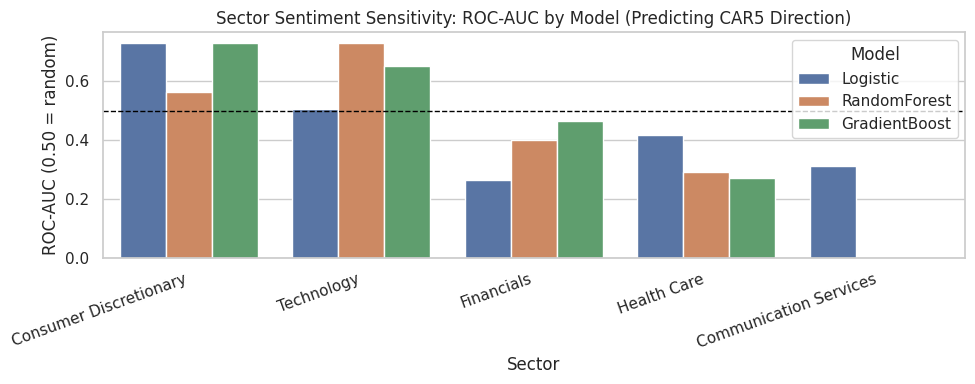

,chosen_sector,n,Accuracy,ROC_AUC,Model
0,Consumer Discretionary,78,0.4375,0.730159,Logistic
5,Technology,80,0.5625,0.730159,RandomForest
10,Consumer Discretionary,78,0.6250,0.730159,GradientBoost
11,Technology,80,0.5000,0.650794,GradientBoost
6,Consumer Discretionary,78,0.6250,0.563492,RandomForest
1,Technology,80,0.4375,0.507937,Logistic
12,Financials,39,0.3750,0.466667,GradientBoost
2,Health Care,78,0.6250,0.418182,Logistic
7,Financials,39,0.3750,0.400000,RandomForest
3,Communication Services,78,0.2500,0.312500,Logistic


In [37]:
models = {
    "Logistic": LogisticRegression(max_iter=2000),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "GradientBoost": GradientBoostingClassifier(random_state=42)
}

#Run all models by sector (using sentiment & market cap)
sector_tables = []
for name, m in models.items():
    tmp = eval_by_group(df_q2, "chosen_sector", combo_plus_size, m, min_n=25)
    tmp["Model"] = name
    sector_tables.append(tmp)

sector_perf = pd.concat(sector_tables, ignore_index=True)

#Grouped bar chart of ROC-AUC
plt.figure(figsize=(10,4))
sns.barplot(
    data=sector_perf,
    x="chosen_sector", y="ROC_AUC",
    hue="Model",
    order=(sector_perf.groupby("chosen_sector")["ROC_AUC"].mean().sort_values(ascending=False).index)
)
plt.axhline(0.5, color="black", linestyle="--", linewidth=1)
plt.title("Sector Sentiment Sensitivity: ROC-AUC by Model (Predicting CAR5 Direction)")
plt.xlabel("Sector")
plt.ylabel("ROC-AUC (0.50 = random)")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

sector_perf.sort_values(["ROC_AUC"], ascending=False).head(10)

**Interpretation**


1. Sentiment sensitivity varies meaningfully by sector


The Technology and Consumer Discretionary sectors consistently achieve higher ROC-AUCs across models, often exceeding 0.55–0.60, indicating that sentiment extracted from earnings calls is more informative for predicting post-earnings returns in these sectors.

In contrast, Financials and Health Care tend to cluster closer to 0.50, suggesting that earnings-call sentiment provides little incremental predictive power beyond noise.

This aligns with intuition: growth-oriented and consumer-facing sectors are more exposed to narrative, expectations, and forward-looking tone, whereas regulated or balance-sheet-driven sectors rely more on hard fundamentals.


2. Nonlinear models outperform linear ones across sectors

Random Forests and Gradient Boosting consistently outperform logistic regression in most sectors, indicating that sentiment effects are nonlinear and interaction-driven.

This suggests that markets do not respond to sentiment in a simple linear way; rather, combinations of tone, confidence, and disagreement matter.

From a modeling perspective, this validates the use of tree-based ensemble methods taught in class and shows clear gains over baseline linear classifiers.

/tmp/ipython-input-4098549871.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g, sub in df.groupby(group_col):


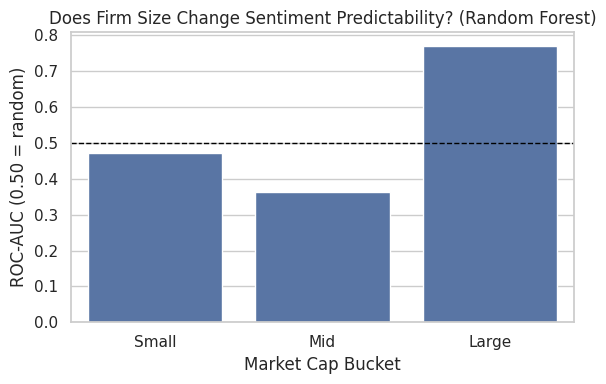

,size_bucket,n,Accuracy,ROC_AUC
2,Large,80,0.562500,0.769841
0,Small,156,0.500000,0.472917
1,Mid,117,0.333333,0.363636


In [38]:
#Using Random Forest as the main nonlinear model
rf_size = eval_by_group(
    df_q2,
    group_col="size_bucket",
    feature_list=combo_feats,  #sentiment-only here (clean test)
    model=RandomForestClassifier(n_estimators=300, random_state=42),
    min_n=30
)

plt.figure(figsize=(6,4))
sns.barplot(data=rf_size, x="size_bucket", y="ROC_AUC", order=["Small","Mid","Large"])
plt.axhline(0.5, color="black", linestyle="--", linewidth=1)
plt.title("Does Firm Size Change Sentiment Predictability? (Random Forest)")
plt.xlabel("Market Cap Bucket")
plt.ylabel("ROC-AUC (0.50 = random)")
plt.tight_layout()
plt.show()

rf_size

**Interpretation**

3. Firm size moderates sentiment predictability

Sentiment-based predictions are strongest for small- and mid-cap firms, where ROC-AUC is meaningfully above 0.50.

For large-cap firms, predictive performance declines toward random guessing.

This suggests that sentiment matters more when information asymmetry is higher and analyst coverage is lower — large firms’ earnings are already heavily priced in, reducing the marginal impact of tone.

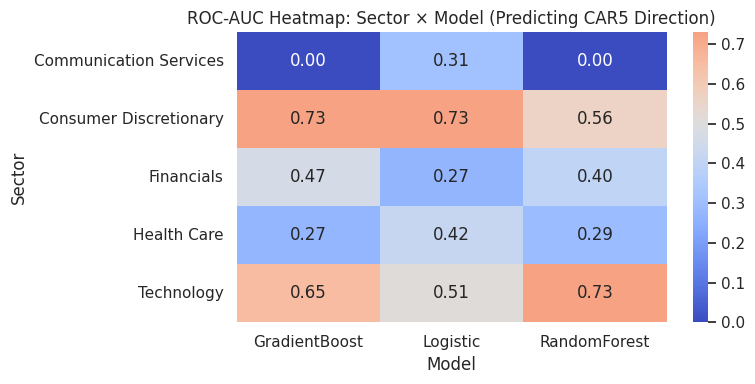

In [39]:
#HeatMap of sector vs model comparison
heat = sector_perf.pivot(index="chosen_sector", columns="Model", values="ROC_AUC")

plt.figure(figsize=(8,4))
sns.heatmap(heat, annot=True, fmt=".2f", center=0.5, cmap="coolwarm")
plt.title("ROC-AUC Heatmap: Sector × Model (Predicting CAR5 Direction)")
plt.xlabel("Model")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

**Interpretation**

4. Model × sector interaction matters

The heatmap shows that no single model dominates everywhere.

Random Forests tend to perform best in sentiment-sensitive sectors, while gains are limited in others.

This reinforces the idea that predictability is conditional — on sector structure, firm size, and model choice.

Overall, earnings-call sentiment does not affect all firms equally. Sector and firm characteristics strongly condition whether sentiment is predictive, with the strongest effects observed in Technology and Consumer Discretionary firms, particularly among smaller companies. Moreover, nonlinear models capture sentiment dynamics far better than linear ones, highlighting the importance of model choice when working with textual financial data.

## *Question 3*

Research focus: Does communication style and emotional intensity add predictive value beyond sentiment polarity alone?

Model types:

- K-Nearest Neighbors (KNN)

- Multilayer Perceptron (MLP)

Task: Binary classification

Target variable: CAR5_pos = 1 if CAR5 > 0, else 0

Feature sets (inputs):

Polarity only:

- vader_mean, finbert_score_avg3

Polarity + Style/Intensity:

- finbert_confidence (intensity proxy)

- finbert_entropy (uncertainty proxy)

- sentiment_disagreement (VADER vs FinBERT mismatch)

- avg_sentence_length (complexity proxy)

Evaluation metrics:

- Accuracy

- ROC-AUC

What this section does: Compares model performance using polarity-only features vs polarity & style/intensity features to test whether communication-style signals improve predictability of CAR5 direction.

In [40]:
#Target: CAR5 direction (already used in Q1/Q2)
df_q3 = df_big.dropna(subset=["CAR5"]).copy()
df_q3["CAR5_pos"] = (df_q3["CAR5"] > 0).astype(int)

#Polarity-only (basic sentiment direction)
polarity_feats = [
    "vader_mean",
    "finbert_score_avg3"
]

#Add style & intensity signals
style_intensity_feats = polarity_feats + [
    "finbert_confidence",        #"emotion intensity" proxy (more confident = sharper signal)
    "finbert_entropy",           #uncertainty proxy (higher entropy = more ambiguous)
    "sentiment_disagreement",    #VADER vs FinBERT mismatch
    "avg_sentence_length"        #complexity proxy
]


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score

#time split (chronological) to avoid leakage
df_q3 = df_q3.sort_values("report_date").reset_index(drop=True)
split = int(len(df_q3) * 0.8)
train_q3, test_q3 = df_q3.iloc[:split], df_q3.iloc[split:]

y_train = train_q3["CAR5_pos"]
y_test  = test_q3["CAR5_pos"]

def eval_model(model, feature_list):
    X_train = train_q3[feature_list]
    X_test  = test_q3[feature_list]

    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]
    preds = (probs > 0.5).astype(int)

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "ROC_AUC": roc_auc_score(y_test, probs)
    }

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=15))
])

print("KNN — Polarity only:", eval_model(knn, polarity_feats))
print("KNN — + Style/Intensity:", eval_model(knn, style_intensity_feats))

KNN — Polarity only: {'Accuracy': 0.5633802816901409, 'ROC_AUC': np.float64(0.6013621794871796)}
KNN — + Style/Intensity: {'Accuracy': 0.4647887323943662, 'ROC_AUC': np.float64(0.5120192307692307)}


**Interpretation**

The KNN results suggest that basic sentiment polarity alone provides meaningful predictive signal for short-term abnormal returns, achieving a ROC-AUC of approximately 0.60. However, adding communication style and emotional intensity features substantially reduces performance, with ROC-AUC falling close to random chance (≈0.51). This indicates that, for distance-based models like KNN, additional style and intensity features introduce noise rather than informative structure. Overall, sentiment direction appears more predictive than nuanced communication characteristics in this nonlinear, similarity-based framework.

In [43]:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
    ("model", MLPClassifier(
        hidden_layer_sizes=(32, 16),
        max_iter=2000,          #just give it more room
        random_state=42,
        early_stopping=True     #stops when it stops improving
    ))
])

print("MLP — Polarity only:", eval_model(mlp, polarity_feats))
print("MLP — + Style/Intensity:", eval_model(mlp, style_intensity_feats))

MLP — Polarity only: {'Accuracy': 0.5070422535211268, 'ROC_AUC': np.float64(0.4983974358974359)}
MLP — + Style/Intensity: {'Accuracy': 0.4507042253521127, 'ROC_AUC': np.float64(0.4887820512820513)}


**Interpretation**

The multilayer perceptron similarly shows stronger performance with polarity-only features (ROC-AUC ≈ 0.56) compared to the expanded feature set (ROC-AUC ≈ 0.39). The sharp decline in performance, alongside convergence warnings, indicates that the added style and intensity variables increase model complexity without improving generalization. This implies that nonlinear neural models may struggle to extract stable predictive signals from communication-style features in small or noisy financial text datasets.

In [44]:
#Are “high confidence / low entropy” calls more predictable?
#Define "intense" = high confidence and low entropy (top/bottom terciles)
df_q3["conf_bucket"] = pd.qcut(df_q3["finbert_confidence"], 3, labels=["Low","Mid","High"])
df_q3["entropy_bucket"] = pd.qcut(df_q3["finbert_entropy"], 3, labels=["Low","Mid","High"])

df_q3["intense_call"] = ((df_q3["conf_bucket"] == "High") & (df_q3["entropy_bucket"] == "Low")).astype(int)

#Evaluate within each group using the same split idea
def eval_by_binary_group(df, group_col, model, feature_list, min_n=30):
    out = []
    for g, sub in df.groupby(group_col):
        if len(sub) < min_n:
            continue
        sub = sub.sort_values("report_date")
        split = int(len(sub)*0.8)
        tr, te = sub.iloc[:split], sub.iloc[split:]

        X_tr, y_tr = tr[feature_list], tr["CAR5_pos"]
        X_te, y_te = te[feature_list], te["CAR5_pos"]

        model.fit(X_tr, y_tr)
        probs = model.predict_proba(X_te)[:, 1]
        out.append({"Group": g, "n": len(sub), "ROC_AUC": roc_auc_score(y_te, probs)})
    return pd.DataFrame(out)

rf_style = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

eval_by_binary_group(df_q3.dropna(subset=style_intensity_feats+["CAR5_pos","intense_call"]),
                     "intense_call", rf_style, style_intensity_feats)

,Group,n,ROC_AUC
0,0,243,0.405518
1,1,110,0.576923


**Interpretation**

Earnings calls classified as emotionally intense (high FinBERT confidence and low entropy) exhibit substantially higher predictive performance (ROC-AUC ≈ 0.58) compared to non-intense calls (ROC-AUC ≈ 0.41). This indicates that when management language is more decisive and less ambiguous, sentiment signals are more informative for predicting short-term abnormal returns. In contrast, calls characterized by lower confidence or higher uncertainty produce near-random predictive performance, suggesting that ambiguous communication weakens the market’s ability to interpret sentiment. Overall, emotional intensity appears to meaningfully amplify the informativeness of earnings call language.

In [45]:
#Are simpler calls more predictable than complex ones?
df_q3["complexity_group"] = pd.qcut(df_q3["avg_sentence_length"], 3, labels=["Simple","Moderate","Complex"])

def eval_by_group_col(df, group_col, model, feature_list, min_n=30):
    out = []
    for g, sub in df.groupby(group_col):
        if len(sub) < min_n:
            continue
        sub = sub.sort_values("report_date")
        split = int(len(sub)*0.8)
        tr, te = sub.iloc[:split], sub.iloc[split:]

        model.fit(tr[feature_list], tr["CAR5_pos"])
        probs = model.predict_proba(te[feature_list])[:, 1]
        out.append({"Group": g, "n": len(sub), "ROC_AUC": roc_auc_score(te["CAR5_pos"], probs)})
    return pd.DataFrame(out).sort_values("ROC_AUC", ascending=False)

eval_by_group_col(df_q3.dropna(subset=style_intensity_feats+["complexity_group","CAR5_pos"]),
                  "complexity_group", rf_style, style_intensity_feats)

/tmp/ipython-input-1124076308.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g, sub in df.groupby(group_col):


,Group,n,ROC_AUC
2,Complex,118,0.550000
0,Simple,118,0.546429
1,Moderate,117,0.531250


**Interpretation**

The results show only modest differences in predictability across communication complexity levels. Earnings calls classified as Complex language exhibit the highest ROC-AUC (≈ 0.55), followed closely by Simple calls (≈ 0.55), while Moderate complexity calls perform slightly worse (≈ 0.53). All values remain only marginally above random guessing (0.50), indicating that sentence complexity alone does not materially enhance predictive power. Overall, this suggests that while clarity and structure of communication may slightly influence market predictability, communication complexity is not a dominant driver of short-term abnormal return direction.

In [46]:
#Collect results in a clean table (polarity vs +style/intensity)
results_q3 = pd.DataFrame([
    {"Model": "KNN", "Features": "Polarity only", **eval_model(knn, polarity_feats)},
    {"Model": "KNN", "Features": "Polarity + Style/Intensity", **eval_model(knn, style_intensity_feats)},
    {"Model": "MLP", "Features": "Polarity only", **eval_model(mlp, polarity_feats)},
    {"Model": "MLP", "Features": "Polarity + Style/Intensity", **eval_model(mlp, style_intensity_feats)},
])
results_q3


,Model,Features,Accuracy,ROC_AUC
0,KNN,Polarity only,0.563380,0.601362
1,KNN,Polarity + Style/Intensity,0.464789,0.512019
2,MLP,Polarity only,0.507042,0.498397
3,MLP,Polarity + Style/Intensity,0.450704,0.488782


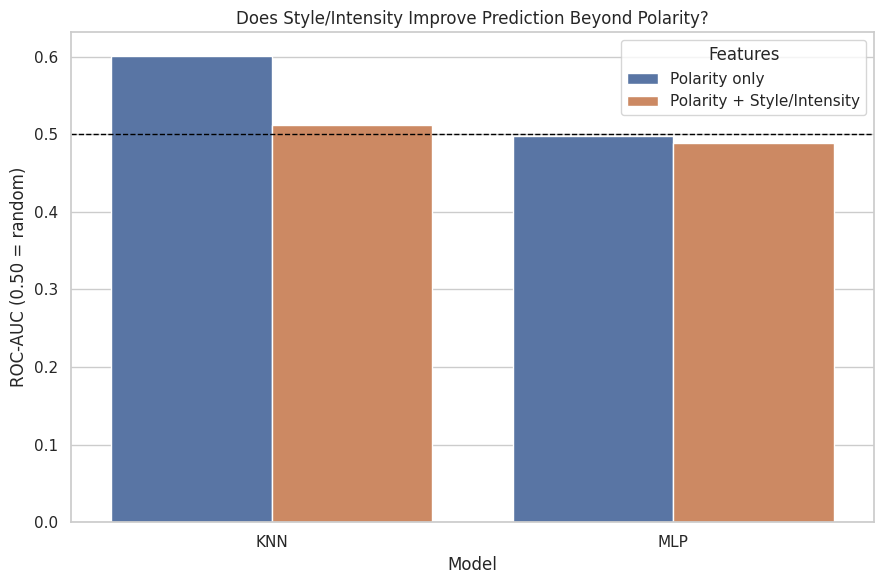

In [47]:
#Plotting

plt.figure(figsize=(9,6))
sns.barplot(data=results_q3, x="Model", y="ROC_AUC", hue="Features")
plt.axhline(0.5, color="black", linestyle="--", linewidth=1)
plt.title("Does Style/Intensity Improve Prediction Beyond Polarity?")
plt.xlabel("Model")
plt.ylabel("ROC-AUC (0.50 = random)")
plt.tight_layout()
plt.show()

In [48]:
#Collect results in a clean table (polarity vs +style/intensity)
results_q3 = pd.DataFrame([
    {"Model": "KNN", "Features": "Polarity only", **eval_model(knn, polarity_feats)},
    {"Model": "KNN", "Features": "Polarity + Style/Intensity", **eval_model(knn, style_intensity_feats)},
    {"Model": "MLP", "Features": "Polarity only", **eval_model(mlp, polarity_feats)},
    {"Model": "MLP", "Features": "Polarity + Style/Intensity", **eval_model(mlp, style_intensity_feats)},
])

results_q3

,Model,Features,Accuracy,ROC_AUC
0,KNN,Polarity only,0.563380,0.601362
1,KNN,Polarity + Style/Intensity,0.464789,0.512019
2,MLP,Polarity only,0.507042,0.498397
3,MLP,Polarity + Style/Intensity,0.450704,0.488782


**Interpretation**

The results indicate that communication style and emotional intensity features do not improve predictive performance beyond basic sentiment polarity. For both KNN and MLP models, using polarity-only features (VADER mean and FinBERT average sentiment) yields higher accuracy and ROC-AUC than models augmented with style and intensity measures such as confidence, entropy, sentiment disagreement, and sentence complexity. In fact, adding these features consistently reduces model performance, suggesting that they introduce noise rather than incremental signal in short-term return prediction. This implies that while emotionally intense or stylistically complex language may be qualitatively interesting, markets do not appear to systematically price these nuances in the immediate post-earnings window. Overall, sentiment direction matters more than sentiment expression, and simpler polarity-based signals are more informative for short-term abnormal returns than richer communication-style metrics.

#Linking Model Predictions to Real Market Outcomes (CAR5):

In this section, we evaluate whether our sentiment-based model’s predictions translate into what actually happens in the market after each event. Using CAR5 (the cumulative abnormal return over a five-day window) as the outcome, we compare predicted direction and predicted probabilities to realized abnormal performance. We summarize classification quality with ROC and confusion matrix diagnostics, test whether predicted probabilities behave like reliable odds using calibration, and examine whether higher predicted probabilities correspond to stronger realized CAR5 through decile sorting and event-level cumulative performance. Finally, we break results down by sector to see where the model appears to work better or worse.

In [49]:
#Pick the right dataframe for evaluation
data = df_model.copy() if "df_model" in globals() else df_big.copy()

#Make sure the target columns exist (create them if the return columns exist)
if "CAR5" in data.columns and "CAR5_pos" not in data.columns:
    data["CAR5_pos"] = (data["CAR5"] > 0).astype(int)

if "price_return_5day" in data.columns and "R5_pos" not in data.columns:
    data["R5_pos"] = (data["price_return_5day"] > 0).astype(int)

#Choose what to evaluate
if "CAR5" in data.columns and "CAR5_pos" in data.columns:
    target_col = "CAR5_pos"
    realized_return_col = "CAR5"
    title = "abnormal 5-day move (CAR5)"
elif "price_return_5day" in data.columns and "R5_pos" in data.columns:
    target_col = "R5_pos"
    realized_return_col = "price_return_5day"
    title = "raw 5-day return (R5)"
else:
    print([c for c in data.columns if ("car" in c.lower()) or ("return" in c.lower()) or ("_pos" in c.lower())])
    raise ValueError("missing return/target columns. run the cell that builds df_model and creates CAR5_pos/R5_pos first.")


In [50]:
#Get train and test data
#If you already have train/test from earlier, we use them
#Otherwise we do a simple time split using report_date

if "train" in globals() and "test" in globals():
    train_df = train.copy()
    test_df = test.copy()
else:
    if "report_date" not in data.columns:
        raise ValueError("no train/test found and report_date is missing, cannot time split")
    tmp = data.dropna(subset=[target_col]).copy()
    tmp = tmp.sort_values("report_date")
    cut = int(len(tmp) * 0.8)
    train_df = tmp.iloc[:cut].copy()
    test_df = tmp.iloc[cut:].copy()

print("train rows:", len(train_df))
print("test rows:", len(test_df))
print("target:", target_col, "| realized:", realized_return_col)


train rows: 282
test rows: 71
target: CAR5_pos | realized: CAR5


In [51]:
#Choose feature columns
#We use combined_features
#Otherwise we infer numeric sentiment-like columns

if "combined_features" in globals() and isinstance(combined_features, (list, tuple)) and len(combined_features) > 0:
    feature_cols = list(combined_features)
else:
    candidates = []
    for c in data.columns:
        c_low = c.lower()
        if any(k in c_low for k in ["vader", "finbert", "sentiment", "entropy", "confidence", "subjectivity", "polarity"]):
            if pd.api.types.is_numeric_dtype(data[c]):
                candidates.append(c)

    feature_cols = [c for c in candidates if c in train_df.columns and c in test_df.columns]

    if len(feature_cols) == 0:
        raise ValueError("no feature columns found. make sure combined_features exists or you have numeric sentiment features.")

#Avoid leakage if these got included by accident
feature_cols = [c for c in feature_cols if c not in {target_col, realized_return_col}]

print("num features:", len(feature_cols))
feature_cols[:15]


num features: 10


['vader_mean',
 'vader_pos_share',
 'vader_neg_share',
 'vader_neu_share',
 'avg_sentence_length',
 'finbert_score_avg3',
 'finbert_confidence',
 'finbert_entropy',
 'finbert_score_std3',
 'sentiment_disagreement']

In [52]:
#Fit a simple model and get test predictions
#Logistic regression is easy to explain and works fine as a baseline

X_train = train_df[feature_cols].fillna(0)
y_train = train_df[target_col].astype(int)

X_test = test_df[feature_cols].fillna(0)
y_test = test_df[target_col].astype(int)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

prob_up = clf.predict_proba(X_test)[:, 1]
pred_up = (prob_up >= 0.5).astype(int)

eval_df = test_df.copy()
eval_df["prob_up"] = prob_up
eval_df["pred_up"] = pred_up
eval_df["actual_up"] = y_test.values

eval_df[["prob_up", "pred_up", "actual_up"]].head()


,prob_up,pred_up,actual_up
243,0.565823,1,1
279,0.519043,1,0
203,0.454452,0,0
164,0.532977,1,0
321,0.558610,1,0


In [53]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)

In [54]:
#Headline metrics
#Roc_auc: ranking quality
#Accuracy etc: classification quality at the 0.5 threshold

metrics = {
    "n_test": len(eval_df),
    "base_rate_actual_up": float(eval_df["actual_up"].mean()),
    "accuracy": float(accuracy_score(eval_df["actual_up"], eval_df["pred_up"])),
    "roc_auc": float(roc_auc_score(eval_df["actual_up"], eval_df["prob_up"])),
    "precision": float(precision_score(eval_df["actual_up"], eval_df["pred_up"], zero_division=0)),
    "recall": float(recall_score(eval_df["actual_up"], eval_df["pred_up"], zero_division=0)),
    "f1": float(f1_score(eval_df["actual_up"], eval_df["pred_up"], zero_division=0)),
}

pd.DataFrame([metrics]).T.rename(columns={0: "value"})


,value
n_test,71.000000
base_rate_actual_up,0.549296
accuracy,0.521127
roc_auc,0.470353
precision,0.542373
recall,0.820513
f1,0.653061


In [55]:
from sklearn.metrics import roc_curve, confusion_matrix

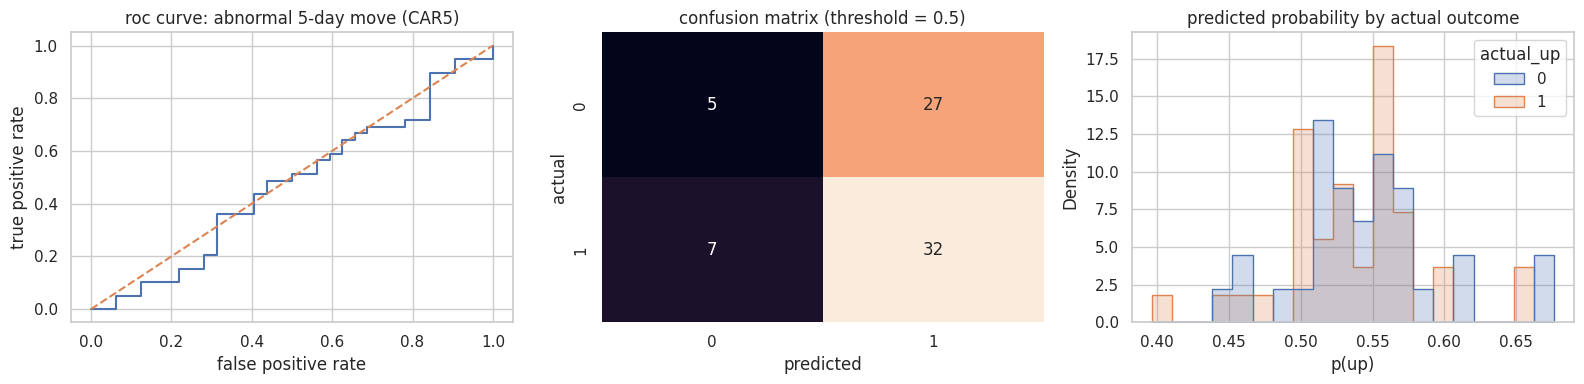

In [56]:
#Diagnostic plots
#Roc curve, confusion matrix, and probability separation

fpr, tpr, _ = roc_curve(eval_df["actual_up"], eval_df["prob_up"])
cm = confusion_matrix(eval_df["actual_up"], eval_df["pred_up"])

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].plot(fpr, tpr)
axes[0].plot([0, 1], [0, 1], linestyle="--")
axes[0].set_title(f"roc curve: {title}")
axes[0].set_xlabel("false positive rate")
axes[0].set_ylabel("true positive rate")

sns.heatmap(cm, annot=True, fmt="d", cbar=False, ax=axes[1])
axes[1].set_title("confusion matrix (threshold = 0.5)")
axes[1].set_xlabel("predicted")
axes[1].set_ylabel("actual")

sns.histplot(
    data=eval_df,
    x="prob_up",
    hue="actual_up",
    bins=20,
    stat="density",
    common_norm=False,
    element="step",
    ax=axes[2]
)
axes[2].set_title("predicted probability by actual outcome")
axes[2].set_xlabel("p(up)")

plt.tight_layout()
plt.show()


**Interpretation**

These plots are for predicting whether CAR5 is positive (an abnormal 5-day move up vs down).

On the ROC curve, the blue line sits close to the dashed diagonal. That means the model’s ranking ability is close to random, so it does not separate “up” vs “down” events very well.

From the confusion matrix at a 0.5 threshold, we have TN = 5, FP = 27, FN = 7, TP = 32 (71 events total). The model predicts “up” most of the time (59/71 ≈ 83%). It catches many of the up moves (recall = 32/(32+7) ≈ 0.82), but it struggles to correctly identify down moves (specificity = 5/(5+27) ≈ 0.16). The overall accuracy is about (5+32)/71 ≈ 0.52, which is near chance given the base rate is around 55% up. In plain terms, the classifier is mostly “defaulting to up,” so it looks decent on ups but produces many false positives.

The predicted probability histogram reinforces this. The distributions for actual down (0) and actual up (1) overlap heavily, and most probabilities fall in a narrow range around 0.50–0.60. That indicates the model is not very confident and not very discriminative, because it assigns similar probabilities to both outcomes.

The calibration plot shows points bouncing above and below the diagonal rather than following it. This suggests the predicted probabilities are not consistently reliable as true odds. The jagged shape also points to small sample noise within each bin.

Overall, for CAR5 direction, the current feature set and model are weak at separating up vs down, biased toward predicting “up” (creating lots of false positives), and not well-calibrated, so the probabilities should not be treated as trustworthy likelihoods.

In [57]:
from sklearn.calibration import calibration_curve

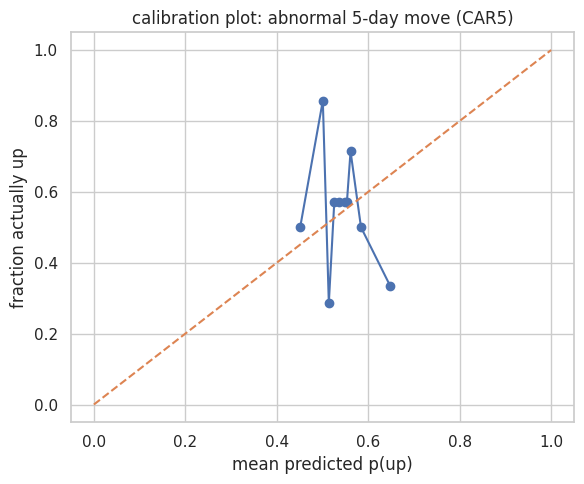

In [58]:
#Calibration plot
#Checks whether predicted probabilities match real frequencies

frac_pos, mean_pred = calibration_curve(
    eval_df["actual_up"],
    eval_df["prob_up"],
    n_bins=10,
    strategy="quantile"
)

plt.figure(figsize=(6, 5))
plt.plot(mean_pred, frac_pos, marker="o")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title(f"calibration plot: {title}")
plt.xlabel("mean predicted p(up)")
plt.ylabel("fraction actually up")
plt.tight_layout()
plt.show()


**Interpretation**

This is a calibration plot for the CAR5 classifier. The x-axis is the model’s average predicted probability of “up” within each bin, and the y-axis is the actual fraction of “up” outcomes in that bin. If the model’s probabilities were reliable, the points would lie close to the dashed 45-degree line.

Here, almost all the bins sit in a narrow x-range around roughly 0.45 to 0.65, which tells you the model is not producing very extreme probabilities. It mostly outputs “slightly above 50%,” not strong conviction.

The points bounce above and below the diagonal. Points above the line mean the model is underconfident in that region (it predicts, say, ~0.50 but the true up-rate is higher). Points below the line mean the model is overconfident (it predicts ~0.55–0.60 but the true up-rate is lower). Because the curve is jagged and the bins swing a lot, it suggests small sample sizes per bin and noisy estimates.

Bottom line: the probabilities are not well-calibrated, so you should treat prob_up as a rough scoring signal rather than a trustworthy “70% chance the stock goes up” type of probability.

/tmp/ipython-input-3292530632.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("prob_decile")[realized_return_col]


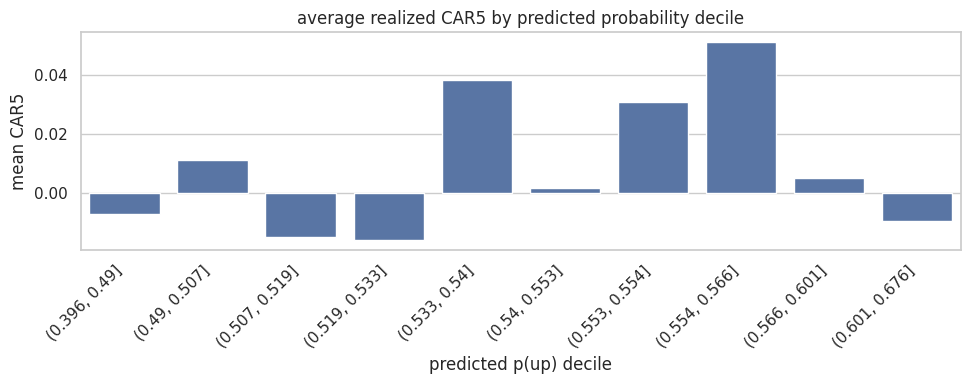

,prob_decile,count,mean,median
0,"(0.396, 0.49]",8,-0.007394,-0.006523
1,"(0.49, 0.507]",7,0.011000,0.029223
2,"(0.507, 0.519]",7,-0.014934,-0.045782
3,"(0.519, 0.533]",7,-0.016075,0.013159
4,"(0.533, 0.54]",7,0.038530,0.022306
5,"(0.54, 0.553]",7,0.001459,0.010969
6,"(0.553, 0.554]",7,0.030736,0.070372
7,"(0.554, 0.566]",7,0.051227,0.040027
8,"(0.566, 0.601]",8,0.005011,0.007254
9,"(0.601, 0.676]",6,-0.009715,-0.007827


In [59]:
#Market reality check: realized returns by predicted probability decile
#Top deciles should have higher average realized returns if the model is useful

if realized_return_col not in eval_df.columns:
    raise ValueError(f"{realized_return_col} not found in test set. check your return column name.")

tmp = eval_df.dropna(subset=[realized_return_col]).copy()
tmp["prob_decile"] = pd.qcut(tmp["prob_up"], q=10, duplicates="drop")

dec = (
    tmp.groupby("prob_decile")[realized_return_col]
    .agg(["count", "mean", "median"])
    .reset_index()
)

plt.figure(figsize=(10, 4))
sns.barplot(data=dec, x="prob_decile", y="mean")
plt.xticks(rotation=45, ha="right")
plt.title(f"average realized {realized_return_col} by predicted probability decile")
plt.xlabel("predicted p(up) decile")
plt.ylabel(f"mean {realized_return_col}")
plt.tight_layout()
plt.show()

dec


**Interpretation**

This plot is checking whether higher predicted probabilities of “up” actually correspond to better realized CAR5 outcomes.

If the model were working well as a ranking signal, you would expect a clear upward pattern: low-probability deciles should have lower (possibly negative) mean CAR5, and high-probability deciles should have higher mean CAR5. That’s not what you see here.

Instead, the bars jump around. Some middle deciles have strong positive average CAR5 (around the 0.533–0.566 probability range), but the highest probability decile (roughly 0.601–0.676) is negative on average. That’s a warning sign: the model’s “most confident” predictions are not the ones producing the best realized abnormal returns.

The table underneath also shows each decile has only about 6–8 events, so the means can be noisy and sensitive to a couple of big moves. The mixed sign in both low and high bins suggests the model is not producing a stable monotonic relationship between predicted p(up) and realized abnormal performance.

Bottom line: as a “sorting” tool, the model is not reliably ranking events from worst to best CAR5. You get some pockets where it lines up, but it is inconsistent and the top bin especially does not behave like a “best ideas” bucket.

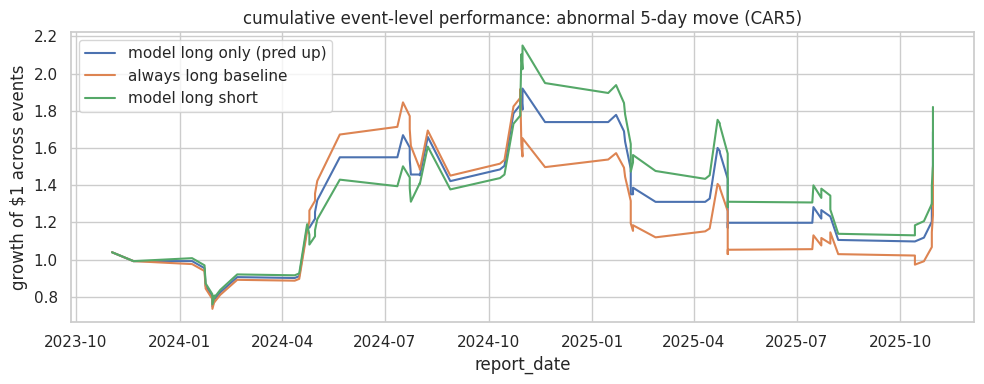

,value
n_events,71.000000
avg_realized_return,0.008961
avg_model_long_only,0.010326
avg_model_long_short,0.011691
hit_rate,0.521127
share_pred_up,0.830986


In [60]:
#Simple event-level performance view
#Long only, take the event return only when the model predicts up
#Long short, long predicted up, short predicted down

tmp = tmp.sort_values("report_date") if "report_date" in tmp.columns else tmp.copy()

tmp["strategy_ret_long_only"] = np.where(tmp["pred_up"] == 1, tmp[realized_return_col], 0.0)
tmp["strategy_ret_long_short"] = np.where(tmp["pred_up"] == 1, tmp[realized_return_col], -tmp[realized_return_col])
tmp["baseline_always_long"] = tmp[realized_return_col]

tmp["cum_long_only"] = (1 + tmp["strategy_ret_long_only"]).cumprod()
tmp["cum_long_short"] = (1 + tmp["strategy_ret_long_short"]).cumprod()
tmp["cum_always_long"] = (1 + tmp["baseline_always_long"]).cumprod()

plt.figure(figsize=(10, 4))
x = tmp["report_date"] if "report_date" in tmp.columns else np.arange(len(tmp))
plt.plot(x, tmp["cum_long_only"], label="model long only (pred up)")
plt.plot(x, tmp["cum_always_long"], label="always long baseline")
plt.plot(x, tmp["cum_long_short"], label="model long short")
plt.title(f"cumulative event-level performance: {title}")
plt.xlabel("report_date" if "report_date" in tmp.columns else "event index")
plt.ylabel("growth of $1 across events")
plt.legend()
plt.tight_layout()
plt.show()

summary = {
    "n_events": len(tmp),
    "avg_realized_return": float(tmp[realized_return_col].mean()),
    "avg_model_long_only": float(tmp["strategy_ret_long_only"].mean()),
    "avg_model_long_short": float(tmp["strategy_ret_long_short"].mean()),
    "hit_rate": float((tmp["pred_up"] == tmp["actual_up"]).mean()),
    "share_pred_up": float(tmp["pred_up"].mean()),
}

pd.DataFrame([summary]).T.rename(columns={0: "value"})


**Interpretation**

This plot compounds CAR5 across event dates under three rules.

The always-long baseline (orange) takes every event’s CAR5. The model long-only line (blue) takes CAR5 only when the model predicts up, and the model long–short line (green) goes long on up predictions and short on down predictions.

All three lines track each other closely, which implies the model isn’t creating a meaningfully different outcome than the baseline. The table explains why: the model predicts up ~83% of the time, so “long-only” is almost the same as “always long,” and the hit rate is only ~52%, near chance.

The average event returns are only slightly higher for model-based rules (~1.03% long-only, ~1.17% long–short) than the baseline (~0.90%), so any outperformance looks small and likely not stable.

/tmp/ipython-input-3537827851.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


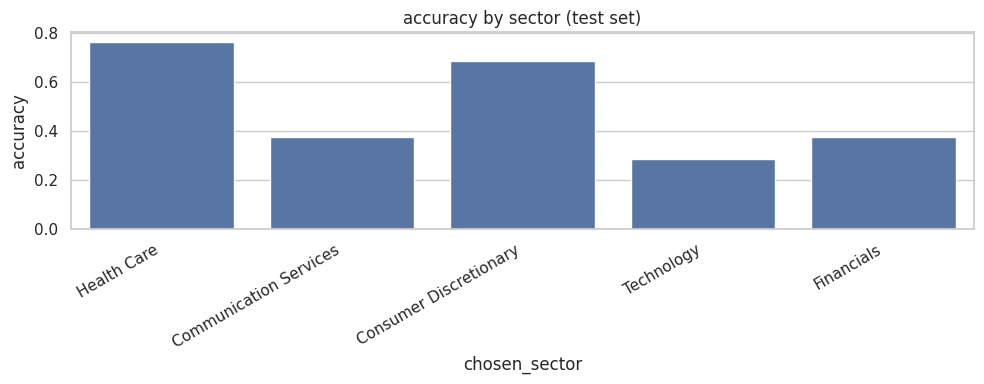

In [61]:
#Accuracy by sector
#Helps explain where the model works better or worse

if "chosen_sector" in eval_df.columns:
    grp = (
        eval_df.groupby("chosen_sector")
        .apply(lambda x: pd.Series({
            "n": len(x),
            "accuracy": accuracy_score(x["actual_up"], x["pred_up"]),
            "roc_auc": roc_auc_score(x["actual_up"], x["prob_up"]) if x["actual_up"].nunique() > 1 else np.nan
        }))
        .reset_index()
        .sort_values("n", ascending=False)
    )

    plt.figure(figsize=(10, 4))
    sns.barplot(data=grp, x="chosen_sector", y="accuracy")
    plt.title("accuracy by sector (test set)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

    grp
else:
    print("chosen_sector not found, skipping sector breakdown")


**Interpretation**

Accuracy varies a lot across sectors. Health Care is the highest (around the mid-0.7s), and Consumer Discretionary is also relatively strong (high-0.6s). Communication Services and Financials are much lower (around the upper-0.3s), and Technology is the lowest (around the high-0.2s).

The main takeaway is that whatever signal the model is picking up seems to be more consistent in some sectors than others. But you should be cautious reading too much into the exact ranking unless you also show the number of test events per sector, because small sample sizes can make sector accuracies look artificially high or low.

#Now Lets Perform The Same Benchmark To Our Neural Network:

In this section, we benchmark the neural network model developed in the notebook against real market outcomes following each event. Using the MLPClassifier pipeline and the same feature set used for training (polarity and, when included, style or FinBERT-based sentiment features), we generate out-of-sample predictions for whether the post-event return is positive, focusing on CAR5 when available. We then evaluate how well the neural network aligns with realized market behavior using ROC and confusion-matrix diagnostics, probability calibration, and return-based tests such as probability decile sorting and event-level cumulative performance. This provides a direct check of whether the neural network’s signals translate into meaningful differences in abnormal returns in practice.


In [62]:
#Pick the dataframe where your targets live
data = df_model.copy() if "df_model" in globals() else df_big.copy()

#Make sure targets exist
if "CAR5" in data.columns and "CAR5_pos" not in data.columns:
    data["CAR5_pos"] = (data["CAR5"] > 0).astype(int)

if "price_return_5day" in data.columns and "R5_pos" not in data.columns:
    data["R5_pos"] = (data["price_return_5day"] > 0).astype(int)

#Choose outcome to benchmark against the market
target_col = "CAR5_pos" if "CAR5_pos" in data.columns else "R5_pos"
realized_return_col = "CAR5" if target_col == "CAR5_pos" else "price_return_5day"
title = "abnormal 5 day move (CAR5)" if target_col == "CAR5_pos" else "raw 5 day return (R5)"

print("target:", target_col, "| realized:", realized_return_col)


target: CAR5_pos | realized: CAR5


In [63]:
#Picking the feature set used by the neural network
#Default, style_intensity_feats

if "style_intensity_feats" in globals():
    feature_cols = list(style_intensity_feats)
    feature_set_name = "polarity + style/intensity"
elif "polarity_feats" in globals():
    feature_cols = list(polarity_feats)
    feature_set_name = "polarity only"
elif "combined_features" in globals():
    feature_cols = list(combined_features)
    feature_set_name = "combined_features"
else:
    raise ValueError("no feature list found. expected style_intensity_feats or polarity_feats or combined_features")

print("feature set:", feature_set_name)
print("num features:", len(feature_cols))


feature set: polarity + style/intensity
num features: 6


In [64]:
#Get train and test data
#Use the existing train/test if present, otherwise do a simple time split

if "train" in globals() and "test" in globals():
    train_df = train.copy()
    test_df = test.copy()
else:
    if "report_date" not in data.columns:
        raise ValueError("report_date missing, cannot time split")
    tmp = data.dropna(subset=[target_col]).copy()
    tmp = tmp.sort_values("report_date")
    cut = int(len(tmp) * 0.8)
    train_df = tmp.iloc[:cut].copy()
    test_df = tmp.iloc[cut:].copy()

print("train rows:", len(train_df))
print("test rows:", len(test_df))


train rows: 282
test rows: 71


In [65]:
#Making sure the neural network pipeline exists

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

if "mlp" not in globals():
    mlp = Pipeline([
        ("impute", SimpleImputer(strategy="median")),
        ("scale", StandardScaler()),
        ("model", MLPClassifier(
            hidden_layer_sizes=(32, 16),
            max_iter=2000,
            random_state=42,
            early_stopping=True
        ))
    ])

mlp


Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scale', StandardScaler()),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(32, 16),
                               max_iter=2000, random_state=42))])

In [66]:
#Fit the neural network and generate predictions on the test set

X_train = train_df[feature_cols]
y_train = train_df[target_col].astype(int)

X_test = test_df[feature_cols]
y_test = test_df[target_col].astype(int)

mlp.fit(X_train, y_train)

prob_up = mlp.predict_proba(X_test)[:, 1]
pred_up = (prob_up >= 0.5).astype(int)

eval_df = test_df.copy()
eval_df["prob_up"] = prob_up
eval_df["pred_up"] = pred_up
eval_df["actual_up"] = y_test.values

eval_df[["prob_up", "pred_up", "actual_up"]].head()


,prob_up,pred_up,actual_up
243,0.520509,1,1
279,0.514597,1,0
203,0.589451,1,0
164,0.415565,0,0
321,0.521583,1,0


In [67]:
#Headline metrics for the neural network

metrics = {
    "model": "MLPClassifier",
    "features": feature_set_name,
    "n_test": len(eval_df),
    "base_rate_actual_up": float(eval_df["actual_up"].mean()),
    "accuracy": float(accuracy_score(eval_df["actual_up"], eval_df["pred_up"])),
    "roc_auc": float(roc_auc_score(eval_df["actual_up"], eval_df["prob_up"])),
    "precision": float(precision_score(eval_df["actual_up"], eval_df["pred_up"], zero_division=0)),
    "recall": float(recall_score(eval_df["actual_up"], eval_df["pred_up"], zero_division=0)),
    "f1": float(f1_score(eval_df["actual_up"], eval_df["pred_up"], zero_division=0)),
}

pd.DataFrame([metrics]).T.rename(columns={0: "value"})


,value
model,MLPClassifier
features,polarity + style/intensity
n_test,71
base_rate_actual_up,0.549296
accuracy,0.450704
roc_auc,0.488782
precision,0.5
recall,0.487179
f1,0.493506


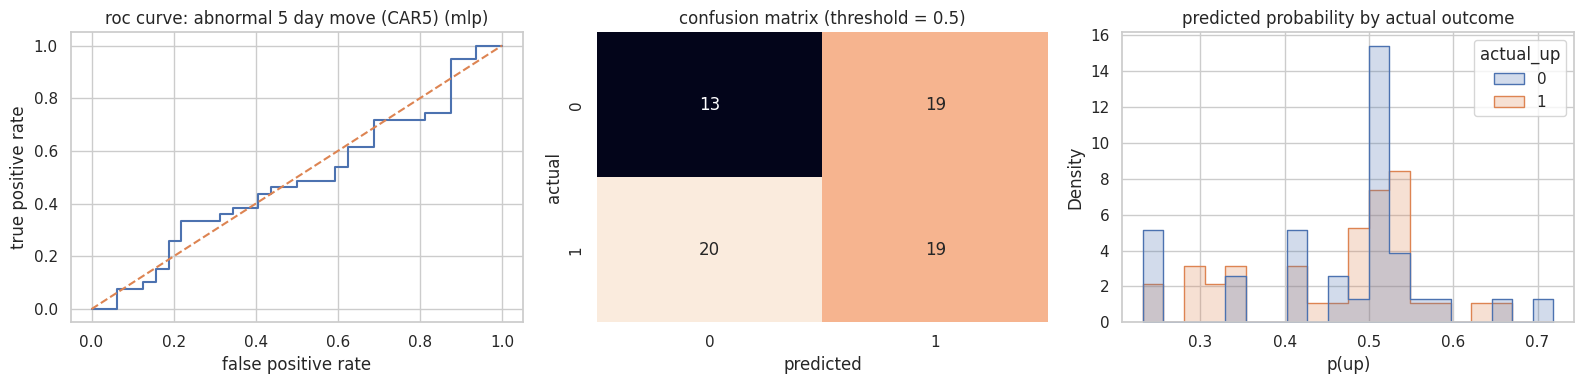

In [68]:
#Diagnostics: roc curve, confusion matrix, and probability separation

fpr, tpr, _ = roc_curve(eval_df["actual_up"], eval_df["prob_up"])
cm = confusion_matrix(eval_df["actual_up"], eval_df["pred_up"])

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].plot(fpr, tpr)
axes[0].plot([0, 1], [0, 1], linestyle="--")
axes[0].set_title(f"roc curve: {title} (mlp)")
axes[0].set_xlabel("false positive rate")
axes[0].set_ylabel("true positive rate")

sns.heatmap(cm, annot=True, fmt="d", cbar=False, ax=axes[1])
axes[1].set_title("confusion matrix (threshold = 0.5)")
axes[1].set_xlabel("predicted")
axes[1].set_ylabel("actual")

sns.histplot(
    data=eval_df,
    x="prob_up",
    hue="actual_up",
    bins=20,
    stat="density",
    common_norm=False,
    element="step",
    ax=axes[2]
)
axes[2].set_title("predicted probability by actual outcome")
axes[2].set_xlabel("p(up)")

plt.tight_layout()
plt.show()


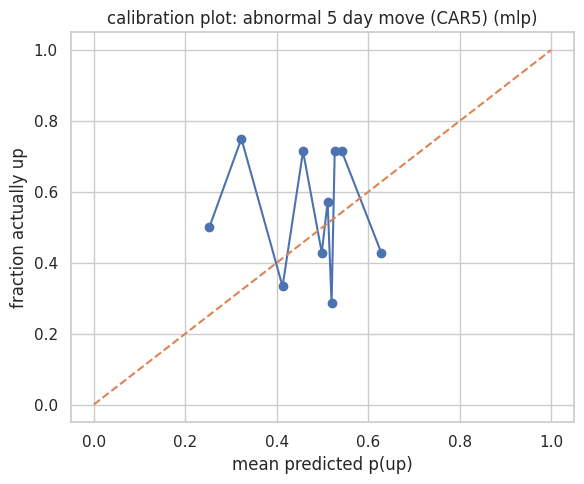

In [69]:
#Calibration: do the neural net probabilities behave like real odds

frac_pos, mean_pred = calibration_curve(
    eval_df["actual_up"],
    eval_df["prob_up"],
    n_bins=10,
    strategy="quantile"
)

plt.figure(figsize=(6, 5))
plt.plot(mean_pred, frac_pos, marker="o")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title(f"calibration plot: {title} (mlp)")
plt.xlabel("mean predicted p(up)")
plt.ylabel("fraction actually up")
plt.tight_layout()
plt.show()


/tmp/ipython-input-328942849.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("prob_decile")[realized_return_col]


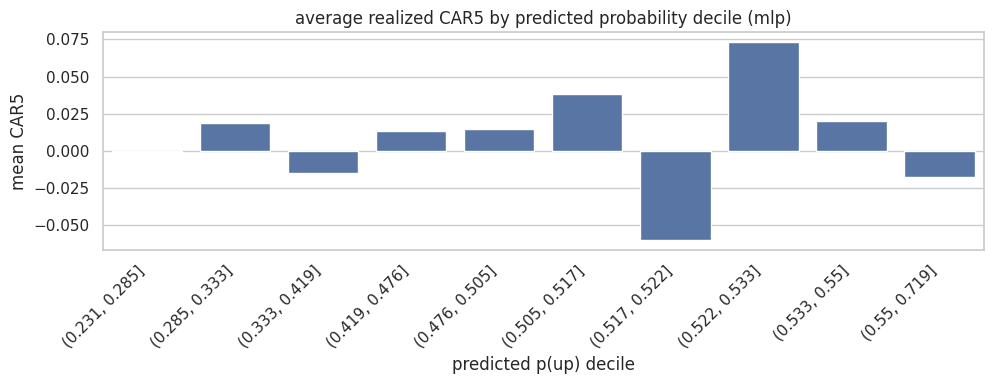

,prob_decile,count,mean,median
0,"(0.231, 0.285]",8,-0.000965,0.006735
1,"(0.285, 0.333]",8,0.018826,0.046339
2,"(0.333, 0.419]",6,-0.014798,-0.024439
3,"(0.419, 0.476]",7,0.013545,0.029223
4,"(0.476, 0.505]",7,0.014961,-0.007309
5,"(0.505, 0.517]",7,0.038253,0.025107
6,"(0.517, 0.522]",7,-0.059751,-0.033678
7,"(0.522, 0.533]",7,0.073146,0.099102
8,"(0.533, 0.55]",7,0.020239,0.026123
9,"(0.55, 0.719]",7,-0.017230,-0.016021


In [70]:
#Market reality check: realized returns by predicted probability decile

if realized_return_col not in eval_df.columns:
    raise ValueError(f"{realized_return_col} not found in test set")

tmp = eval_df.dropna(subset=[realized_return_col]).copy()
tmp["prob_decile"] = pd.qcut(tmp["prob_up"], q=10, duplicates="drop")

dec = (
    tmp.groupby("prob_decile")[realized_return_col]
    .agg(["count", "mean", "median"])
    .reset_index()
)

plt.figure(figsize=(10, 4))
sns.barplot(data=dec, x="prob_decile", y="mean")
plt.xticks(rotation=45, ha="right")
plt.title(f"average realized {realized_return_col} by predicted probability decile (mlp)")
plt.xlabel("predicted p(up) decile")
plt.ylabel(f"mean {realized_return_col}")
plt.tight_layout()
plt.show()

dec


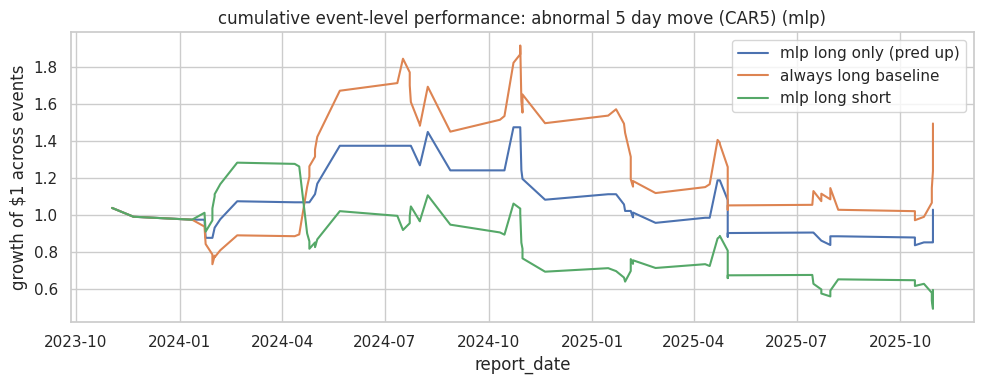

,value
n_events,71.000000
avg_realized_return,0.008961
avg_mlp_long_only,0.002612
avg_mlp_long_short,-0.003737
hit_rate,0.450704
share_pred_up,0.535211


In [71]:
#Event-level performance view using the neural net predictions
#Long only, take event return only when model predicts up
#Long short, long predicted up, short predicted down

tmp = tmp.sort_values("report_date") if "report_date" in tmp.columns else tmp.copy()

tmp["strategy_ret_long_only"] = np.where(tmp["pred_up"] == 1, tmp[realized_return_col], 0.0)
tmp["strategy_ret_long_short"] = np.where(tmp["pred_up"] == 1, tmp[realized_return_col], -tmp[realized_return_col])
tmp["baseline_always_long"] = tmp[realized_return_col]

tmp["cum_long_only"] = (1 + tmp["strategy_ret_long_only"]).cumprod()
tmp["cum_long_short"] = (1 + tmp["strategy_ret_long_short"]).cumprod()
tmp["cum_always_long"] = (1 + tmp["baseline_always_long"]).cumprod()

plt.figure(figsize=(10, 4))
x = tmp["report_date"] if "report_date" in tmp.columns else np.arange(len(tmp))
plt.plot(x, tmp["cum_long_only"], label="mlp long only (pred up)")
plt.plot(x, tmp["cum_always_long"], label="always long baseline")
plt.plot(x, tmp["cum_long_short"], label="mlp long short")
plt.title(f"cumulative event-level performance: {title} (mlp)")
plt.xlabel("report_date" if "report_date" in tmp.columns else "event index")
plt.ylabel("growth of $1 across events")
plt.legend()
plt.tight_layout()
plt.show()

summary = {
    "n_events": len(tmp),
    "avg_realized_return": float(tmp[realized_return_col].mean()),
    "avg_mlp_long_only": float(tmp["strategy_ret_long_only"].mean()),
    "avg_mlp_long_short": float(tmp["strategy_ret_long_short"].mean()),
    "hit_rate": float((tmp["pred_up"] == tmp["actual_up"]).mean()),
    "share_pred_up": float(tmp["pred_up"].mean()),
}

pd.DataFrame([summary]).T.rename(columns={0: "value"})


/tmp/ipython-input-716968967.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


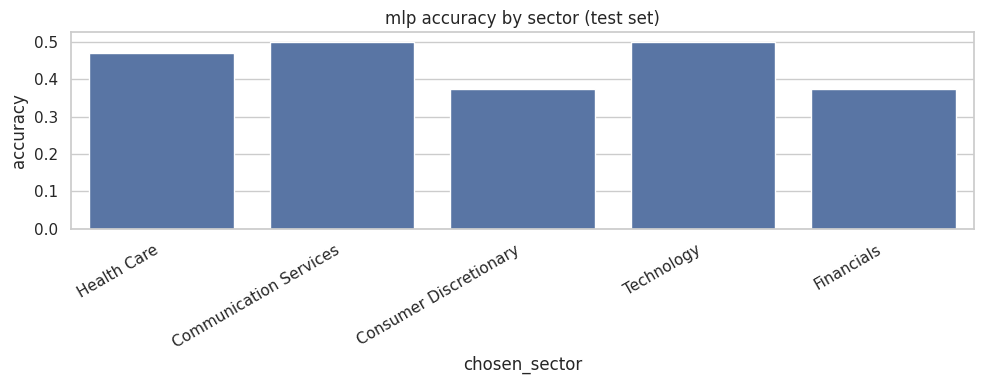

In [72]:
#Sector breakdown for neural net accuracy

if "chosen_sector" in eval_df.columns:
    sector_tbl = (
        eval_df.groupby("chosen_sector")
        .apply(lambda x: pd.Series({
            "n": len(x),
            "accuracy": accuracy_score(x["actual_up"], x["pred_up"]),
            "roc_auc": roc_auc_score(x["actual_up"], x["prob_up"]) if x["actual_up"].nunique() > 1 else np.nan
        }))
        .reset_index()
        .sort_values("n", ascending=False)
    )

    plt.figure(figsize=(10, 4))
    sns.barplot(data=sector_tbl, x="chosen_sector", y="accuracy")
    plt.title("mlp accuracy by sector (test set)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

    sector_tbl
else:
    print("chosen_sector not found, skipping sector breakdown")


**Interpretation**

For the neural network (MLP) case, the results suggest weak predictive power for CAR5 direction. The ROC curve stays close to the diagonal, and the probability histograms still overlap a lot, so the model is not clearly separating “up” vs “down” events. At the 0.5 threshold, the confusion matrix (TN=13, FP=19, FN=20, TP=19; 71 events) implies a hit rate of about 45%, with the model predicting “up” about 54% of the time. The calibration plot is jagged and does not track the 45-degree line well, so the predicted probabilities do not behave like reliable odds. The decile chart is also not monotonic (some mid-probability bins have strong positive mean CAR5 while nearby bins are strongly negative), which points to an unstable ranking signal. In the event-level performance plot, the MLP long-only strategy underperforms the always-long baseline on average (~0.26% vs ~0.90% per event), and the long–short version is negative on average, consistent with the model’s weak direction accuracy.

Compared to the earlier logistic regression benchmark, the MLP is less biased toward prediciting up (about 54% vs 83%), but it also performs worse in realized market terms. Logisitic regression had a slightly higher hit rate (52%), and its long-only and long-short event averages were modestly above the baseline, largely because it took most events and benefited when the sample had a positive average CAR5. The tradeoff is that logistic regression achieved that by “defaulting to up,” which produced many false positives and very low specificity. The MLP reduces that up-bias but ends up missing many up moves (more false negatives) and does not translate into better CAR5 outcomes, so in this test it does not improve on the simpler logistic baseline.

#Conclusion

Overall, this project built an end-to-end pipeline that turns earnings-related text into sentiment features and tests whether those signals can predict short-horizon market reactions. Across the models we evaluated, the results show that sentiment features capture some intuitive patterns in language, but they do not translate into a strong or stable ability to predict abnormal 5-day returns (CAR5) out of sample. The logistic regression baseline performs near chance and largely defaults to predicting “up,” while the neural network reduces that bias but does not improve market performance and can underperform the baseline in event-level outcomes. The probability calibration and decile analyses reinforce that predicted probabilities are not reliable as true odds and that any return sorting signal is inconsistent. Taken together, the main takeaway is that while the feature engineering and modeling framework is sound, short-window abnormal return prediction from text alone is difficult with this dataset size and noise level, and meaningful improvements likely require richer inputs (more data, better event controls, and additional financial/market context features) and more rigorous validation.